<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/ko/part_1/06_과적합과 해결 기법의 발전.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 6장 과적합과 해결 기법의 발전

> "단순함이 궁극의 정교함이다." - 레오나르도 다 빈치 (Leonardo da Vinci)

딥러닝 모델은 수많은 파라미터를 통해 복잡한 함수를 표현할 수 있는 강력한 능력을 지닙니다. 하지만 이러한 능력은 때때로 *양날의 검*과 같습니다. 모델이 훈련 데이터에 지나치게 맞춰지면, 새로운 데이터에 대한 예측 성능이 오히려 떨어지는 **과적합(overfitting)** 현상이 발생하기 때문입니다.

1986년 역전파 알고리즘이 재조명된 이후, 과적합은 딥러닝 연구자들에게 끊임없는 도전 과제였습니다. 초기에는 단순히 모델의 크기를 줄이거나, 훈련 데이터를 늘리는 방식으로 과적합에 대응했습니다. 하지만 이러한 방법들은 모델의 표현력을 제한하거나, 데이터 수집의 어려움으로 인해 한계가 있었습니다. 2012년 AlexNet의 등장은 딥러닝의 새로운 시대를 열었지만, 동시에 과적합 문제의 심각성을 부각시켰습니다. AlexNet은 이전 모델들보다 훨씬 많은 파라미터를 가졌기 때문에, 과적합의 위험이 더욱 커졌습니다. 이후 딥러닝 모델의 규모가 기하급수적으로 증가하면서, 과적합 문제는 딥러닝 연구의 핵심 과제가 되었습니다.

이 장에서는 과적합의 본질을 이해하고, 이를 해결하기 위해 발전해 온 다양한 기법들을 살펴보겠습니다. 마치 탐험가가 미지의 영역을 탐험하며 지도를 만들어나가듯, 딥러닝 연구자들은 과적합이라는 난관을 극복하기 위해 끊임없이 새로운 방법들을 탐색하고 발전시켜 왔습니다.


## 6.1 과적합의 이해

과적합은 1670년 William Hopkins의 저술에서 처음 언급되었지만, 현대적인 의미로는 1935년 *Quarterly Review of Biology*에서 "13개의 관측치로 6변량 분석을 하는 것은 과적합처럼 보인다"라는 언급으로 시작되었습니다. 이후 1950년대 통계학에서 본격적으로 연구되기 시작했으며, 특히 1952년 "Tests of Fit in Time Series" 논문에서 시계열 분석의 맥락에서 중요하게 다뤄졌습니다.

딥러닝에서 과적합 문제는 2012년 AlexNet의 등장과 함께 새로운 국면을 맞이했습니다. AlexNet은 약 6천만 개의 파라미터를 가진 대규모 신경망으로, 이전 모델들과 비교할 수 없는 규모였습니다. 이후 딥러닝 모델의 규모가 기하급수적으로 증가하면서, 과적합 문제는 더욱 심각해졌습니다. 예를 들어, 현대의 대규모 언어 모델(LLM)들은 수천억 개의 파라미터를 가지고 있어, 과적합 방지가 모델 설계의 핵심 과제가 되었습니다.

이러한 도전에 대응하여, 드롭아웃(2014), 배치 정규화(2015)와 같은 혁신적인 해결책들이 제안되었고, 최근에는 훈련 이력을 활용한 과적합 감지 및 예방(2024) 등 더욱 정교한 방법들이 연구되고 있습니다. 특히 대규모 모델에서는 조기 종료(early stopping)와 같은 전통적인 방법부터 앙상블 학습, 데이터 증강과 같은 현대적 기법까지 다양한 전략을 복합적으로 활용하고 있습니다.

간단한 예제를 통해 과적합 현상을 직관적으로 이해해 보겠습니다. 노이즈가 포함된 사인(sine) 함수 데이터에 대해 서로 다른 차수(degree)의 다항식(polynomial)을 적용해 보겠습니다.

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_1362795/2136320363.py:25: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x, y, deg) # Get the parameter values


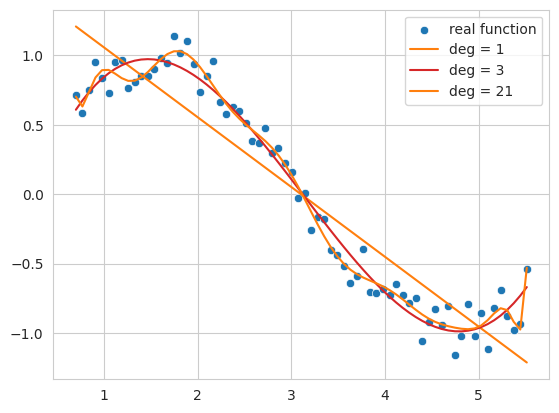

In [ ]:
import numpy as np
import seaborn as sns

# Noisy sin graph
def real_func(x):
    y = np.sin(x) + np.random.uniform(-0.2, 0.2, len(x))
    return y

# Create x data from 40 to 320 degrees.  Use a step value to avoid making it too dense.
x = np.array([np.pi/180 * i for i in range(40, 320, 4)])

y = real_func(x)


import seaborn as sns

sns.scatterplot(x=x, y=y, label='real function')

# Plot with 1st, 3rd, and 21th degree polynomials.  
for deg in [1, 3, 21]:  
# Get the coefficients for the corresponding degree using polyfit, and create the estimated function using poly1d.
    params = np.polyfit(x, y, deg) # Get the parameter values
    # print(f" {deg} params = {params}")
    p = np.poly1d(params) # Get the line function
    sns.lineplot(x=x, y=p(x), color=f"C{deg}", label=f"deg = {deg}")

위 코드는 노이즈가 포함된 사인 함수 데이터를 생성하고, 1차, 3차, 21차 다항식을 사용하여 이 데이터에 피팅(fitting)하는 예제입니다.

*   **1차 함수 (deg = 1):**  데이터의 전반적인 추세를 따르지 못하고 단순한 직선 형태로 나타납니다. 이는 모델이 데이터의 복잡성을 충분히 표현하지 못하는 *과소적합(underfitting)* 상태를 보여줍니다.

*   **3차 함수 (deg = 3):**  데이터의 기본적인 패턴을 비교적 잘 포착하면서도, 노이즈에 크게 흔들리지 않는 부드러운 곡선 형태를 보입니다.

*  **21차 함수 (deg = 21)**: 훈련 데이터의 노이즈까지 지나치게 따라가면서, 훈련 데이터에만 과도하게 최적화된 *과적합(overfitting)* 상태를 보여줍니다.

이처럼 모델의 복잡도(여기서는 다항식의 차수)가 너무 낮으면 과소적합, 너무 높으면 과적합이 발생합니다. 우리가 궁극적으로 찾고자 하는 것은 훈련 데이터뿐만 아니라 새로운 데이터에도 잘 일반화(generalization)되는 모델, 즉, 실제 사인 함수에 가장 가까운 근사 함수입니다.

과적합은 모델의 복잡도(용량, capacity)가 훈련 데이터의 양에 비해 상대적으로 클 때 발생합니다. 신경망은 수많은 파라미터를 가지며 표현력이 매우 높기 때문에, 특히 과적합에 취약합니다. 훈련 데이터가 부족하거나, 데이터에 노이즈가 많을 때도 과적합이 발생할 수 있습니다. 과적합은 다음과 같은 특징으로 나타납니다.

*   **훈련 데이터**에 대한 손실(loss)은 지속적으로 감소합니다.
*   **검증 데이터**(validation data) 에 대한 손실은 감소하다가, 어느 시점부터는 오히려 증가합니다.
*   이는 모델이 훈련 데이터의 노이즈와 세세한 부분까지 학습하여, 훈련 데이터에만 지나치게 특화되었기 때문입니다.

결과적으로, 과적합된 모델은 훈련 데이터에서는 높은 성능을 보이지만, 실제 새로운 데이터에서는 예측 성능이 떨어지게 됩니다. 이러한 과적합을 방지하기 위해, 이후에는 L1/L2 규제, 드롭아웃, 배치 정규화 등 다양한 기법들을 자세히 살펴보겠습니다.

## 6.2 규제화 기법

> **도전과제:** 모델의 복잡도를 효과적으로 제어하면서 일반화 성능을 향상시킬 수 있는 방법은 무엇일까?
>
> **연구자의 고뇌:** 과적합을 막기 위해 모델의 크기를 줄이는 것은 표현력을 제한할 수 있고, 단순히 훈련 데이터를 늘리는 것도 항상 가능한 것은 아닙니다. 모델의 구조나 학습 과정에 제약을 가하여 훈련 데이터에 대한 과도한 최적화를 방지하고, 새로운 데이터에 대한 예측 성능을 향상시키는 방법이 필요했습니다.

### 6.2.1 L1, L2 규제
신경망에서 사용하는 대표적인 규제(regularization)로는 L1, L2 규제가 있습니다. L1은 라소(Lasso), L2는 리지(Ridge) 규제(를 이용한 선형 회귀)를 뜻합니다.

리지 회귀, 라소 회귀라고도 부르는데, 각 회귀는 일정한 페널티 항을 도입해서 파라미터의 움직임을 제한합니다. 두 방법의 특성 차이를 표로 정리하면 다음과 같습니다.

| 특징          | 리지 회귀(Ridge Regression) | 라소 회귀(Lasso Regression)  |
| ------------ | ----------------- | --------------- |
| 페널티 유형    | L2 페널티를 부과한다. 페널티 항은 파라미터의 제곱값 합산에 알파값을 곱한 항이다.  | L1 페널티를 부과한다. 파라미터 절대값 합산에 알파값을 곱한 항이다.                |
| 파라미터 영향  | 값이 큰 파라미터를 억제하여 0에 가깝게 도달하게 만든다. 0이 되지는 않는다   | 알파 값이 클 때 일부 파라미터 값을 0으로 만들어서 보다 간소한 모델을 만들 수 있다  |
| 전체 영향    | 모든 파라미터가 그대로 보존. 따라서 영향도가 적은 파라미터도 그대로 남는다.   | 관련있는 파라미터만 남아 선택적 특성을 가진다. 복잡한 모델을 좀 더 단순하게 설명할 수 있게 한다.                                                                                                               |
| 최적화 특성   | 이상적인 값에 라소에 비해 덜 민감.    | 페널티 항목이 절대값이기 때문에 이상적인 값에 민감.   |

수식을 표현하면 다음과 같습니다.


-   리지 목적함수 (Ridge Regression Objective Function)

    "수정된 리지 목적 함수" = (수정하지 않은 선형 회귀 함수) + $\alpha \cdot \sum (\text{파라미터})^2$

    $f_{\beta} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 + \alpha \sum_{j} \beta_{j}^2$

    여기서 $\beta$는 구하고자 하는 파라미터(가중치) 벡터입니다.  $\alpha \sum_{j} \beta_{j}^2$는 페널티(penalty) 항 또는 규제 항이라고 합니다. $\alpha$는 규제 항의 크기를 조절하는 하이퍼파라미터입니다. 파라미터를 구하는 공식은 다음과 같습니다.

    $\beta = \underset{\beta}{\operatorname{argmin}} \left( \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 + \alpha \sum_{j} \beta_{j}^2 \right)$

-   라소 목적함수 (Lasso Regression Objective Function)

    "수정된 라소 목적 함수" = (수정하지 않은 선형 회귀 함수) + $ \alpha \cdot \sum |\text{파라미터}| $

    $f_{\beta} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 + \alpha \sum_{j} |\beta_{j}|$

     $\beta = \underset{\beta}{\operatorname{argmin}} \left( \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 + \alpha \sum_{j} |\beta_j| \right)$


파라미터 제곱의 합을 페널티 항으로 사용하는 L2를 신경망에서는 흔히 가중치 감쇠(weight decay)라고 합니다. 리지(L2) 회귀를 이용해서 단순 선형회귀와 차이가 어떻게 나는지 살펴보겠습니다. sklearn에 구현된 모델을 사용합니다. 이를 위해 입력인 x데이터를 차수만큼 차원을 늘려 만들어 주어야 합니다. 다음 간단한 유틸리티 함수를 이용해서 만들도록 하겠습니다.



In [15]:
def get_x_powered(x, p=1):
    size = len(x)

    # The shape of the created x will be (data size, degree)
    new_x = np.zeros((size, p))

    for s in range(len(x)): # Iterate over data size
        for d in range(1, p+1): # Iterate over degrees
            new_x[s][d-1] = x[s]**d # Raise x to the power of the degree.

    return new_x


# Let's take a quick look at how it works.
deg = 3
x = np.array([np.pi/180 * i for i in range(20, 35, 5)])
y = real_func(x)  # real_func는 이전 코드에 정의되어 있다고 가정

print(f"x = {x}")
new_x = get_x_powered(x, p=deg)

print(f"new_x = {new_x}")

x = [0.34906585 0.43633231 0.52359878]
new_x = [[0.34906585 0.12184697 0.04253262]
 [0.43633231 0.19038589 0.08307151]
 [0.52359878 0.27415568 0.14354758]]


3차이기 때문에  $x$값이  $x^2, x^3$  으로 늘어납니다. 예를 들어 0.3490, 0.1218(0.3490의 제곱), 0.04253(0.3490의 세제곱) 이 그 예입니다. 만약 10차이면  $x^{10}$  까지 데이터가 만들어 집니다. 페널티항의 알파값은 0이상 무한대 값을 가질 수 있습니다. 알파값이 커질수록 규제강도가 큰 것입니다. 차수는 13으로 고정하고 선형회귀 함수와 리지회귀를 알파값을 바꿔가며 비교해 보겠습니다.

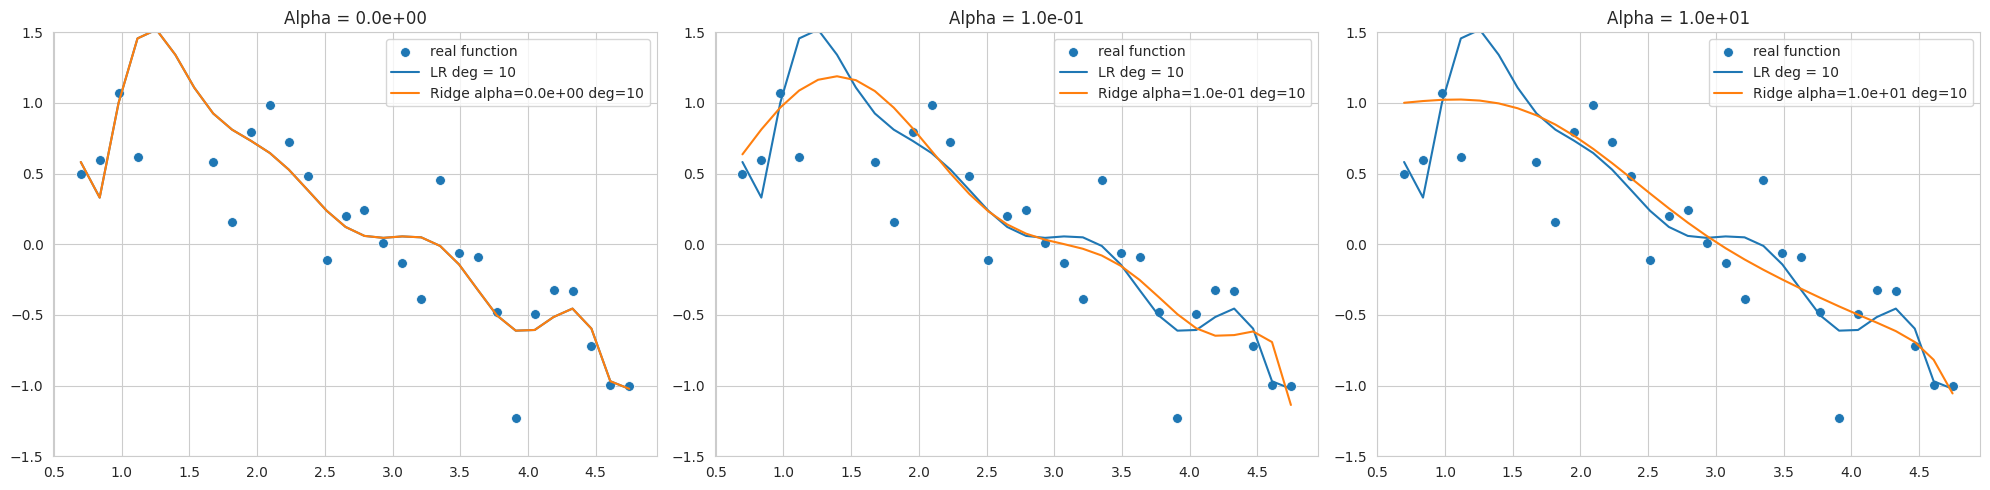

In [18]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a noisy sine wave (increased noise)
def real_func(x):
    return np.sin(x) + np.random.normal(0, 0.4, len(x))  # Increased noise

# Create x data (narrower range)
x = np.array([np.pi / 180 * i for i in range(40, 280, 8)])  # Narrower range, larger step

y = real_func(x)

# Degree of the polynomial
deg = 10

# List of alpha values to compare (adjusted)
alpha_list = [0.0, 0.1, 10]  # Adjusted alpha values
cols = len(alpha_list)

fig, axes_list = plt.subplots(1, cols, figsize=(20, 5))  # Adjusted figure size

for i, alpha in enumerate(alpha_list):
    axes = axes_list[i]

    # Plot the original data
    sns.scatterplot(ax=axes, x=x, y=y, label='real function', s=50)  # Increased marker size

    # Plot linear regression
    params = np.polyfit(x, y, deg)
    p = np.poly1d(params)
    sns.lineplot(ax=axes, x=x, y=p(x), label=f"LR deg = {deg}")

    # Ridge regression (using Pipeline, solver='auto')
    model = make_pipeline(PolynomialFeatures(degree=deg), Ridge(alpha=alpha, solver='auto'))
    model.fit(x.reshape(-1, 1), y)  # Reshape x for pipeline
    y_pred = model.predict(x.reshape(-1, 1)) # Reshape x for prediction
    sns.lineplot(ax=axes, x=x, y=y_pred, label=f"Ridge alpha={alpha:0.1e} deg={deg}")

    axes.set_title(f"Alpha = {alpha:0.1e}")
    axes.set_ylim(-1.5, 1.5)  # Limit y-axis range
    axes.legend()

plt.tight_layout()
plt.show()


위 그래프는 10차 다항식을 사용하여 노이즈가 추가된 사인 함수 데이터에 피팅한 결과로, 각기 다른 `alpha` 값(규제 강도)을 사용한 Ridge 회귀 결과를 보여줍니다. 데이터 범위가 좁고 노이즈가 많아 낮은 차수에서도 과적합이 쉽게 발생합니다.

*   **Alpha = 0.0:** Ridge 회귀는 일반 최소 제곱 선형 회귀와 같아지며, 10차 다항식은 훈련 데이터 노이즈까지 따라가 심하게 굴곡진 과적합 형태를 보입니다.
*   **Alpha = 0.1:** 약한 규제가 적용되어 `alpha=0`일 때보다 굴곡은 줄었지만, 여전히 노이즈에 민감하여 사인 함수와는 거리가 있습니다.
*   **Alpha = 10:** 강한 규제로 곡선이 훨씬 부드러워져, 데이터의 전반적인 추세(사인 함수)를 잘 나타냅니다. 이는 L2 규제(Ridge 회귀)가 과적합을 효과적으로 제어함을 보여줍니다.

적절한 `alpha` 값 선택으로 모델 복잡도를 제어하고 일반화 성능을 높일 수 있습니다. L2 규제는 가중치를 0에 가깝게 만들어 모델을 안정화하는 데 유용합니다.

`sklearn.linear_model.Ridge` 모델은 `solver`에 따라 최적화 방법이 달라질 수 있습니다. 특히 이 예제처럼 데이터 범위가 좁고 노이즈가 많으면 `'svd'`나 `'cholesky'` solver가 더 안정적일 수 있어, `solver` 선택에 주의해야 합니다 (코드에서는 `'cholesky'` 지정).


### 6.2.2 파이토치에서 L1, L2 규제 적용

파이토치와 케라스는 L1, L2 규제를 구현하는 방식에 차이가 있습니다. 케라스는 각 층(layer)에 규제 항을 직접 추가하는 방식(`kernel_regularizer`, `bias_regularizer`)을 지원합니다.

In [ ]:
# In Keras, you can specify regularization when declaring a layer.
keras.layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    input_shape=(784,))

반면, 파이토치는 옵티마이저(optimizer)에 가중치 감쇠(weight decay)를 설정하는 방식으로 L2 규제를 적용하며, L1 규제는 일반적으로 사용자 정의 손실 함수를 통해 구현합니다.

In [5]:
import torch.nn as nn
import torch

def custom_loss(outputs, targets, model, lambda_l1=0.01, lambda_l2=0.01,):
    mse_loss = nn.MSELoss()(outputs, targets)
    
    l1_loss = 0.
    l2_loss = 0.
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param)) # Take the absolute value of the parameters.
        l2_loss += torch.sum(param ** 2)  # Square the parameters.
    
    total_loss = mse_loss + lambda_l1 * l1_loss + lambda_l2 * l2_loss # Add L1 and L2 penalty terms to the loss.
    return total_loss

# Example usage within a training loop (not runnable as is)
# for inputs, targets in dataloader:
#     # ... (rest of the training loop)
#     loss = custom_loss(outputs, targets, model)
#     loss.backward()
    # ... (rest of the training loop)

위 예제처럼 custom_loss 함수를 정의하여 L1, L2 규제를 모두 적용할 수 있습니다. 하지만 대개는 L2 규제에 해당하는 weight_decay를 옵티마이저에 설정하여 사용합니다. 그런데 Adam, SGD 옵티마이저에서는 가중치 감쇠를 L2 규제와는 약간 다르게 구현합니다. 전통적인 L2 규제는 손실 함수에 파라미터 제곱 항을 더하는 방식입니다.

$L_{n+1} = L_{n} + \frac{ \lambda }{2} \sum w^2$

이를 파라미터에 대해 미분하면 다음과 같습니다.

$\frac{\partial L_{n+1}}{\partial w} = \frac{\partial L_{n}}{\partial w} +\lambda w$

SGD와 Adam은 이 식에서 $\lambda w$ 항을 직접 기울기에 더하는 방식으로 구현되었습니다. chapter_05/optimizers/ SGD 코드는 다음과 같습니다.

In [ ]:
if self.weight_decay != 0:
    grad = grad.add(p, alpha=self.weight_decay)

이 방식은 모멘텀(momentum)이나 적응적 학습률(adaptive learning rate)과 결합될 때, 손실 함수에 L2 규제 항을 추가하는 것과 정확히 동일한 효과를 내지 않습니다.

**AdamW와 가중치 감쇠의 분리 (Decoupled Weight Decay)**

2017년 ICLR에 발표된 "Fixing Weight Decay Regularization in Adam" 논문(https://arxiv.org/abs/1711.05101)에서는 Adam 옵티마이저에서 가중치 감쇠가 L2 규제와 다르게 동작하는 문제를 지적하고, 이를 수정한 AdamW 옵티마이저를 제안했습니다. AdamW에서는 가중치 감쇠를 기울기 업데이트와 분리하여 파라미터 업데이트 단계에서 직접 적용합니다. 코드는 동일한 basic.py에 있습니다.

In [ ]:
# PyTorch AdamW weght decay
if weight_decay != 0:
    param.data.mul_(1 - lr * weight_decay)

AdamW는 파라미터값에 1 - lr * weight_decay를 곱합니다.

*   **기존 Adam의 가중치 감쇠**: 기울기 업데이트 단계에서 가중치 감쇠 항 ($\lambda w$)이 학습률($lr$) 및 다른 기울기 조정 항(예: 모멘텀)과 함께 고려됩니다. 이로 인해 가중치 감쇠의 효과가 학습률 및 다른 하이퍼파라미터 설정에 따라 달라질 수 있습니다.
*   **AdamW의 가중치 감쇠**: 가중치 감쇠가 파라미터 업데이트 단계에서 별도로 적용되므로, 학습률이나 다른 하이퍼파라미터에 덜 의존적입니다. 즉, 가중치 감쇠의 효과가 더 예측 가능하고 일관됩니다.

결론적으로, AdamW의 방식이 더 정확한 L2 규제 구현에 가깝습니다. SGD, Adam의 가중치 감쇠를 L2 규제라고 부르는 것은 역사적인 이유와 유사한 효과 때문이지만, 엄밀하게는 별도의 규제 기법으로 보는 것이 더 정확하며, AdamW는 이러한 차이를 명확히 하여 더 나은 성능을 제공합니다.

### 6.2.3 손실 평면에서의 규제효과 분석

L1과 L2 규제가 모델의 학습에 미치는 영향을 시각적으로 이해하기 위해, 4장에서 소개했던 손실 평면(loss surface) 시각화 기법을 활용해 보겠습니다. 규제가 없는 경우와 L2 규제를 적용한 경우의 손실 평면 변화를 비교하고, 규제 강도(`weight_decay`)에 따른 최적해의 위치 변화를 관찰합니다.

In [ ]:
import sys

from dldna.chapter_05.visualization.loss_surface import xy_perturb_loss,  hessian_eigenvectors, visualize_loss_surface 
from dldna.chapter_04.utils.data import get_dataset, get_device   
from dldna.chapter_04.utils.metrics import load_model  

import torch
import torch.nn as nn
import numpy as np
import torch.utils.data as data_utils
from torch.utils.data import  DataLoader


device = get_device()  # Get the device (CPU or CUDA)
train_dataset, test_dataset = get_dataset()  # Load the datasets.  

act_name = "ReLU"
model_file = f"SimpleNetwork-{act_name}.pth"

small_dataset = data_utils.Subset(test_dataset, torch.arange(0, 256))  # Use a subset of the test dataset
data_loader = DataLoader(small_dataset, batch_size=256, shuffle=True)  # Create a data loader
loss_func = nn.CrossEntropyLoss()  # Define the loss function

# Load the trained model.
trained_model, _ = load_model(model_file=model_file, path="./tmp/opts/ReLU") # 4장의 load_model 사용
trained_model = trained_model.to(device)  # Move the model to the device

top_n = 2  # Number of top eigenvalues/eigenvectors to compute
top_eigenvalues, top_eigenvectors =  hessian_eigenvectors(model=trained_model, loss_func=loss_func, data_loader=data_loader, top_n=top_n, is_cuda=True)  # 5장의 함수 사용

d_min ,d_max, d_num = -1, 1, 50  # Define the range and number of points for the grid
lambda1, lambda2 = np.linspace(d_min, d_max, d_num).astype(np.float32), np.linspace(d_min, d_max, d_num).astype(np.float32)  # Create the grid of lambda values
x, y, z = xy_perturb_loss(model=trained_model, top_eigenvectors=top_eigenvectors, data_loader=data_loader, loss_func=loss_func, lambda1=lambda1, lambda2=lambda2, device=device) # 5장의 함수 사용

`xy_perturb_loss`로 근사 함수를 만든 다음, 그 근사함수에 다시 (x,y)를 넣어 새롭게 z 값을 구합니다. 이렇게 하는 이유는 5장에서 처럼 `xy_perturb_loss`로 구한 값으로 등고선을 그리면 최소값이 조금 달라서 옵티마이저가 수렴하는 포인트가 조금 벗어나기 때문입니다. 이제 옵티마이저가 흘러가는 경로는 모두 표현하지 않고 가장 마지막 최저점만을 감쇠값인 weight_decay 값을 증가시켜가며 비교해 봅니다.

Function parameters = [ 4.59165436  0.34582255 -0.03204057 -1.09810435  1.54530407]
Optimal parameters: [ 4.59165436  0.34582255 -0.03204057 -1.09810435  1.54530407]

train_loss_surface: SGD
SGD: Iter=1 loss=4.7671 w=[-0.8065, 0.9251]
SGD: Iter=200 loss=1.9090 w=[0.3458, -0.0320]

train_loss_surface: SGD
SGD: Iter=1 loss=4.7671 w=[-0.2065, 0.3251]
SGD: Iter=200 loss=1.9952 w=[0.1327, -0.0077]

train_loss_surface: SGD
SGD: Iter=1 loss=4.7671 w=[0.1935, -0.0749]
SGD: Iter=200 loss=2.0293 w=[0.0935, -0.0051]

train_loss_surface: SGD
SGD: Iter=1 loss=4.7671 w=[0.9935, -0.8749]
SGD: Iter=200 loss=2.0641 w=[0.0587, -0.0030]

train_loss_surface: SGD
SGD: Iter=1 loss=4.7671 w=[1.1935, -1.0749]
SGD: Iter=200 loss=2.0694 w=[0.0537, -0.0027]


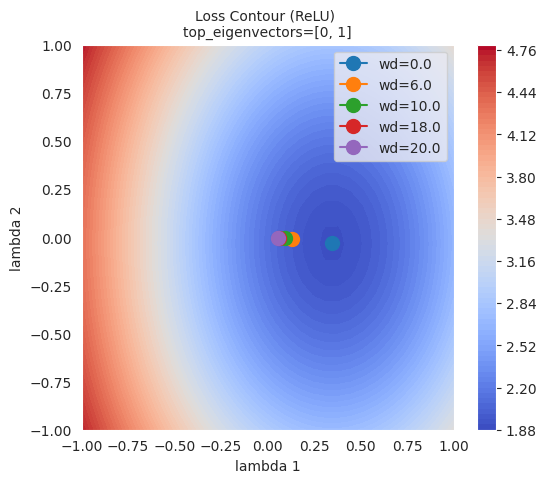

In [8]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim  # Import optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset

# 5장, 4장 함수들 import
from dldna.chapter_05.visualization.loss_surface import (
    hessian_eigenvectors,
    xy_perturb_loss,
    visualize_loss_surface
)
from dldna.chapter_04.utils.data import get_dataset, get_device
from dldna.chapter_04.utils.metrics import load_model
from dldna.chapter_05.visualization.gaussian_loss_surface import (
    get_opt_params,
    train_loss_surface,
    gaussian_func # gaussian_func 추가.
)


device = get_device()
_, test_dataset = get_dataset(dataset="FashionMNIST") 
small_dataset = Subset(test_dataset, torch.arange(0, 256))
data_loader = DataLoader(small_dataset, batch_size=256, shuffle=True)
loss_func = nn.CrossEntropyLoss()

act_name = "ReLU" # Tanh로 실험하려면 이 부분을 변경
model_file = f"SimpleNetwork-{act_name}.pth"
trained_model, _ = load_model(model_file=model_file, path="./tmp/opts/ReLU") 
trained_model = trained_model.to(device)

top_n = 2
top_eigenvalues, top_eigenvectors = hessian_eigenvectors(
    model=trained_model,
    loss_func=loss_func,
    data_loader=data_loader,
    top_n=top_n,
    is_cuda=True
)

d_min, d_max, d_num = -1, 1, 30 # 5장의 30을 사용
lambda1 = np.linspace(d_min, d_max, d_num).astype(np.float32)
lambda2 = np.linspace(d_min, d_max, d_num).astype(np.float32)

x, y, z = xy_perturb_loss(
    model=trained_model,
    top_eigenvectors=top_eigenvectors,
    data_loader=data_loader,
    loss_func=loss_func,
    lambda1=lambda1,
    lambda2=lambda2,
    device=device # device 추가
)


# --- Optimization and Visualization ---

# Find the parameters that best fit the data.
popt, _, offset = get_opt_params(x, y, z)  # offset 사용

print(f"Optimal parameters: {popt}")

# Get a new z using the optimized surface function (Gaussian).
# No need for global g_offset, we can use the returned offset.
z_fitted = gaussian_func((x, y), *popt,offset) # offset을 더해야 함.


data = [(x, y, z_fitted)]  # Use z_fitted

axes = visualize_loss_surface(data, act_name=act_name, color="C0", size=6, levels=80, alpha=0.7, plot_3d=False)
ax = axes[0]

# Train with different weight decays and plot trajectories.
for n, weight_decay in enumerate([0.0, 6.0, 10.0, 18.0, 20.0]):
# for n, weight_decay in enumerate([0.0]):  # For faster testing
    points_sgd_m = train_loss_surface(
        lambda params: optim.SGD(params, lr=0.1, momentum=0.7, weight_decay=weight_decay),
        [d_min, d_max],
        200,
        (*popt, offset) # unpack popt and offset
    )
    ax.plot(
        points_sgd_m[-1, 0],
        points_sgd_m[-1, 1],
        color=f"C{n}",
        marker="o",
        markersize=10,
        zorder=2,
        label=f"wd={weight_decay:0.1f}"
    )
    ax.ticklabel_format(axis='both', style='scientific', scilimits=(0, 0))

plt.legend()
plt.show()

그림에서 볼 수 있듯이, L2 규제(weight decay)가 클수록 옵티마이저가 도달한 최종 지점이 손실 함수의 최저점에서 멀어지는 것을 확인할 수 있습니다. 이는 L2 규제가 가중치가 너무 커지는 것을 방지하여 모델이 과적합되지 않도록 도와주기 때문입니다.

L1 규제는 일부 가중치를 0으로 만들어 희소 모델(sparse model)을 생성합니다. 모델의 복잡도를 낮추고 불필요한 특성을 제거하고 싶을 때 유용합니다. 반면, L2 규제는 가중치를 완전히 0으로 만들지는 않고, 모든 가중치를 작게 유지합니다. L2 규제는 일반적으로 더 안정적인 수렴을 보이며, 가중치를 점차적으로 줄여나가기 때문에 '부드러운 규제'라고도 합니다.

L1 규제와 L2 규제는 문제의 특성, 데이터, 모델의 목적에 따라 다르게 적용됩니다. 일반적으로 L2 규제가 더 널리 사용되지만, 경우에 따라 두 가지 규제를 모두 시도해보고, 어떤 것이 더 나은 성능을 보이는지 확인하는 것이 좋습니다. 또한, L1 규제와 L2 규제를 결합한 Elastic Net 규제도 고려해볼 수 있습니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥 다이브 : Elastic Net 규제 - L1과 L2의 조화)"}

## Elastic Net 규제 - L1과 L2의 조화

Elastic Net은 L1 규제와 L2 규제를 결합한 정규화 방법입니다. 각 규제의 장점을 취하고 단점을 보완하여, 더 유연하고 효과적인 모델을 만들 수 있습니다.

**핵심:**

*   **L1 규제 (Lasso):** 가중치의 절대값 합을 제한합니다.  일부 가중치를 *정확히 0으로* 만들어 희소한(sparse) 모델을 생성합니다.  특성 선택(feature selection) 효과가 있어, 불필요한 특성을 제거하고 모델을 단순화합니다.
*   **L2 규제 (Ridge):** 가중치의 제곱 합을 제한합니다.  모든 가중치를 *작게* 유지하여 모델의 과적합(overfitting)을 방지합니다. 수렴이 안정적이고 부드럽게 가중치를 줄입니다.
*   **Elastic Net:** L1 규제와 L2 규제를 *동시에* 적용합니다.  두 규제의 효과를 모두 얻을 수 있습니다.

**수식:**

Elastic Net의 비용 함수는 다음과 같이 표현됩니다.

$Cost = Loss + \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} (w_i)^2$


*   `Loss`: 원래 모델의 손실 함수 (예: MSE, Cross-Entropy)
*   `λ₁`: L1 규제의 강도를 조절하는 하이퍼파라미터
*   `λ₂`: L2 규제의 강도를 조절하는 하이퍼파라미터
*   `wᵢ`: 모델의 가중치

**장점:**

*   **특성 선택 + 과적합 방지:** L1 규제의 특성 선택 효과와 L2 규제의 과적합 방지 효과를 모두 얻을 수 있습니다.
*   **상관관계가 높은 특성 처리:** L1 규제는 상관관계가 높은 특성 중 하나만 선택하고 나머지는 0으로 만드는 경향이 있습니다. Elastic Net은 L2 규제를 통해 이러한 문제를 완화하여, 상관관계가 높은 특성들을 *함께* 선택하거나 *함께* 제거하는 경향을 보입니다.
*   **유연성:** `λ₁`과 `λ₂`를 조절하여 L1 규제와 L2 규제의 비중을 조절할 수 있습니다.  `λ₁=0`이면 L2 규제(Ridge), `λ₂=0`이면 L1 규제(Lasso)가 됩니다.

**단점:**

*   **하이퍼파라미터 튜닝:** `λ₁`과 `λ₂` 두 개의 하이퍼파라미터를 튜닝해야 하므로, L1이나 L2 규제보다 튜닝이 더 복잡할 수 있습니다.
*   **계산 비용:** L1, L2를 동시에 계산해야 하므로, 계산 비용이 약간 더 증가할 수 있습니다(현대 머신러닝에서는 큰 문제는 아님).

**적용하는 경우**

*   특성(feature)이 많고, 그 중 일부만 중요할 것으로 예상될 때 (특성 선택이 필요할 때)
*   특성 간에 상관관계가 높을 때
*   L1 규제와 L2 규제 중 어떤 것이 더 좋을지 불확실할 때 (두 가지를 모두 시도해보고 싶을 때)
*   과적합을 방지하면서도, 어느 정도 희소한 모델을 만들고 싶을 때

**요약:** Elastic Net은 L1과 L2의 장점을 결합한 강력한 규제 방법입니다. 하이퍼파라미터 튜닝이 필요하지만, 다양한 문제에서 좋은 성능을 보일 수 있습니다.

:::

## 6.3 드롭아웃(Dropout)

### 6.3.1 드롭아웃의 원리
드롭아웃은 신경망에서 과적합을 방지하는 강력한 규제 방법 중 하나입니다. 학습 과정에서 무작위로 일부 뉴런을 비활성화(dropout)하여, 특정 뉴런이나 뉴런 간의 조합이 학습 데이터에 과도하게 의존하는 것을 방지합니다.  이는 마치 여러 사람이 각자 다른 부분을 학습한 후 힘을 합쳐 문제를 해결하는 앙상블 학습과 유사한 효과를 냅니다.  각 뉴런이 독립적으로 중요한 특징을 학습하도록 유도하여, 모델의 일반화 성능을 향상시킵니다. 일반적으로 완전연결층(fully connected layer)에 적용되며, 비활성화 비율은 20%에서 50% 사이로 설정됩니다.  드롭아웃은 학습 시에만 적용되고, 추론(inference) 시에는 모든 뉴런을 사용합니다.

### 6.3.2 파이토치에서 드롭아웃의 구현

파이토치에서 드롭아웃은 다음과 같이 간단하게 구현할 수 있습니다.

In [9]:
import torch.nn as nn

class Dropout(nn.Module):
    def __init__(self, dropout_rate):
        super(Dropout, self).__init__()
        self.dropout_rate = dropout_rate

    def forward(self, x):
        if self.training:
            mask = torch.bernoulli(torch.ones_like(x) * (1 - self.dropout_rate)) / (1 - self.dropout_rate)
            return x * mask
        else:
            return x

# Usage example.  Drops out 0.5 (50%).
dropout = Dropout(dropout_rate=0.5)

# Example input data
inputs = torch.randn(1000, 100)

# Forward pass (during training)
dropout.train()
outputs_train = dropout(inputs)

# Forward pass (during inference)
dropout.eval()
outputs_test = dropout(inputs)

print("Input shape:", inputs.shape)
print("Training output shape:", outputs_train.shape)
print("Test output shape", outputs_test.shape)
print("Dropout rate (should be close to 0.5):", 1 - torch.count_nonzero(outputs_train) / outputs_train.numel())

Input shape: torch.Size([1000, 100])
Training output shape: torch.Size([1000, 100])
Test output shape torch.Size([1000, 100])
Dropout rate (should be close to 0.5): tensor(0.4997)


구현은 매우 간단합니다. `mask` 값을 입력 텐서에 곱하여 일정 비율의 뉴런을 비활성화합니다. 드롭아웃 층은 별도의 학습 가능한 파라미터를 가지지 않으며, 단순히 입력의 일부를 무작위로 0으로 만드는 역할을 합니다. 실제 신경망에서는 드롭아웃 층을 다른 층들 (예: 선형 층, 합성곱 층) 사이에 삽입하여 사용합니다.
드롭아웃은 훈련 시에는 무작위로 뉴런을 제거하지만, 추론 시에는 모든 뉴런을 사용합니다. 이때, 훈련 시와 추론 시의 출력 값의 스케일을 맞추기 위해, *inverted dropout* 방식을 사용합니다. Inverted dropout은 훈련 시에 (1 - dropout_rate)로 나누어 스케일링을 미리 수행함으로써, 추론 시에는 별도의 연산 없이 그대로 사용할 수 있게 합니다. 이렇게 하면 추론 시에도 앙상블 학습과 유사한 효과를 얻을 수 있습니다. 즉, 여러 개의 부분 네트워크(sub-network)를 평균 내는 것과 같은 효과를 내면서, 동시에 계산 효율성도 높일 수 있습니다.

단순한 데이터를 이용해서 드롭아웃이 얼마나 효과적인지 그래프를 통해 살펴보겠습니다. 소스코드는 `chapter_06/plot_dropout.py`이며 중요하지 않은 코드라 지면상 소개는 생략합니다. 상세히 주석이 달려 있으므로 소스코드를 보는 것은 어렵지 않습니다. 그래프를 그려보면 드롭아웃을 적용한 모델(파란색)이 테스트 정확도가 훨씬 높다는 것을 알 수 있습니다.


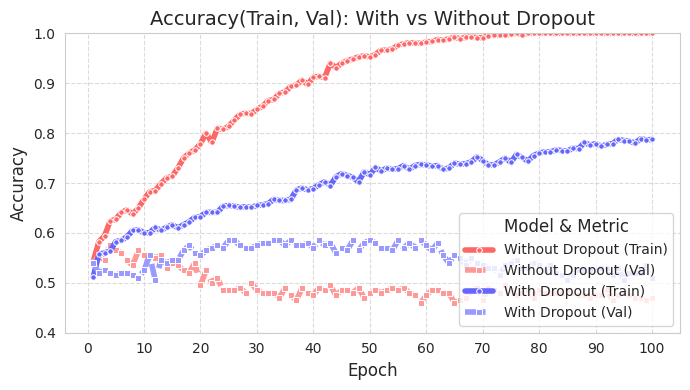

In [11]:
from dldna.chapter_06.plot_dropout import plot_dropout_effect

plot_dropout_effect()

드롭아웃을 적용한 모델(With Dropout)의 훈련 정확도는 드롭아웃을 적용하지 않은 모델(Without Dropout)보다 낮지만, 검증 정확도는 더 높습니다. 이는 드롭아웃이 훈련 데이터에 대한 과적합을 줄이고, 모델의 일반화 성능을 향상시켰음을 의미합니다.

## 6.4 배치 정규화(batch normalization)

### 6.4.1 배치정규화의 개념과 효과

배치 정규화는 규제의 역할과 동시에 훈련 시 데이터의 안정성을 높이는 방법입니다. 배치 정규화는 2015년 Ioffe와 Szegedy의 논문 [참고 2]에서 처음 제안되었습니다. 딥러닝에서 데이터가 각 층을 통과하면서 활성화 값의 분포가 변화하는 현상(internal covariate shift)이 발생합니다. 이로 인해 훈련 속도가 느려지고 모델이 불안정해집니다 (분포가 바뀌므로 계산 스텝이 더 소요됨). 특히나 층이 많을수록 이런 문제는 심해집니다. 배치 정규화는 이를 완화하기 위해 미니 배치 단위로 데이터를 정규화합니다.

배치 정규화의 핵심 아이디어는 미니 배치 단위로 데이터를 정규화하는 것입니다. 다음 코드를 보면 쉽게 이해됩니다.


In [ ]:
# Calculate the mean and variance of the mini-batch
batch_mean = x.mean(dim=0)
batch_var = x.var(dim=0, unbiased=False)

# Perform normalization
x_norm = (x - batch_mean) / torch.sqrt(batch_var + epsilon)

# Apply scale and shift parameters
y = gamma * x_norm + beta

일반적으로 배치 정규화는 1개 미니 배치 안에서 데이터의 분산과 평균을 가지고 전체 데이터를 적절히 분포 변화를 가져오게 합니다. 먼저 정규화를 수행한 다음 일정한 정도의 스케일 파라미터와 이동 파라미터를 적용합니다. 위의 gamma가 스케일 파라미터이고 beta가 이동 파라미터입니다.  단순히  $y = ax + b$ 를 생각하면 편리합니다. 정규화 수행 중에 사용하는 epsilon은 수치 해석에서 흔히 나오는 아주 작은 상수값(1e-5나 1e-7)입니다. 수치적 안정성(numerical stability)을 위해 사용되는 값입니다. 배치 정규화는 다음과 같은 추가적인 효과를 제공합니다.

*   **학습 속도 향상**: 각 층의 활성화 값 분포를 안정화시켜 gradient vanishing/exploding 문제를 완화하고, 더 큰 학습률(learning rate)을 사용할 수 있게 해줍니다.
*   **초기화 의존성 감소**: 가중치 초기화에 덜 민감하게 만들어, 학습을 더 쉽게 시작할 수 있습니다.
*   **규제 효과**: 미니 배치 단위로 통계를 계산하기 때문에, 약간의 노이즈를 추가하는 효과가 있어 과적합(overfitting)을 방지하는 데 도움이 됩니다. (Dropout과 함께 사용하면 효과가 더 좋습니다.)

특성이 2개가 있는 데이터를 임의로 만들고 이를 순수 정규화 적용한 경우와 스케일, 이동 파라미터를 적용한 경우를 그래프로 비교해 보겠습니다. 시각화를 통해서 미니배치에 대한 정규화가 어떤 수치적 의미를 가지는지 쉽게 이해할 수 있습니다.

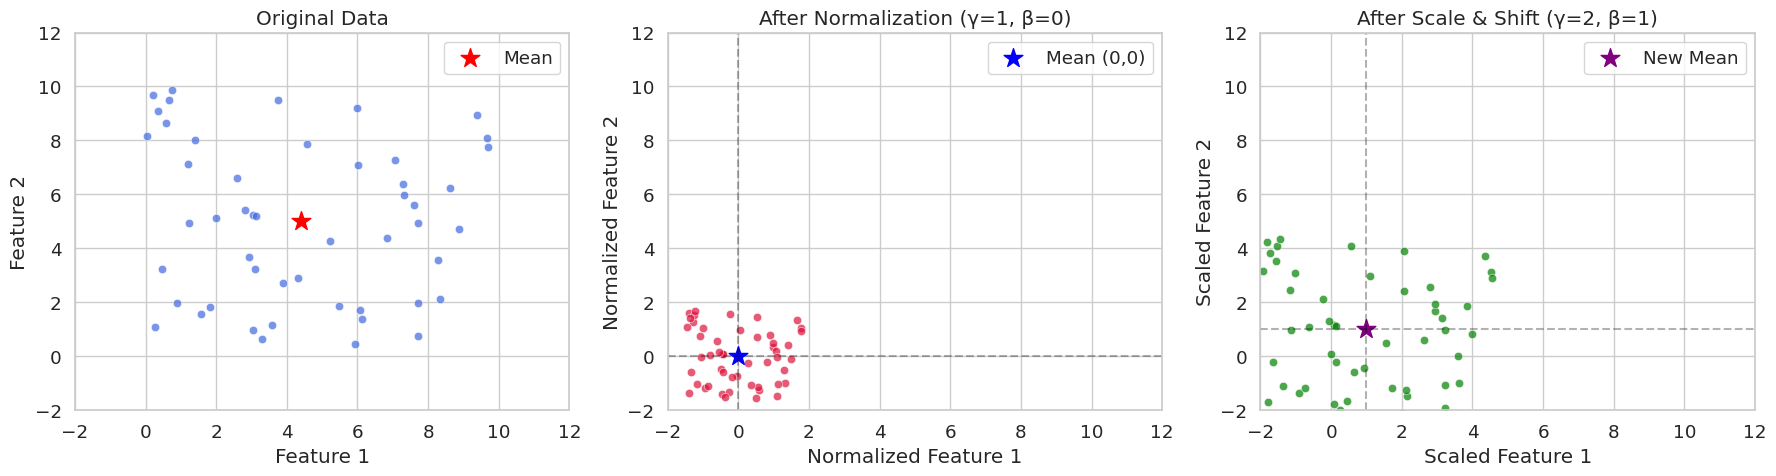


Original Data Statistics:
Mean: [4.40716778 4.99644709]
Variance: [8.89458134 8.45478364]

Normalized Data Statistics (γ=1, β=0):
Mean: [-2.70894418e-16 -3.59712260e-16]
Variance: [0.99999888 0.99999882]

Scaled Data Statistics (γ=2, β=1):
Mean: [1. 1.]
Variance: [3.9999955  3.99999527]


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.random.rand(50, 2) * 10

# Batch normalization (including scaling parameters)
def batch_normalize(x, epsilon=1e-5, gamma=1.0, beta=0.0):
    mean = x.mean(axis=0)
    var = x.var(axis=0)
    x_norm = (x - mean) / np.sqrt(var + epsilon)
    x_scaled = gamma * x_norm + beta
    return x_norm, mean, x_scaled

# Perform normalization (gamma=1.0, beta=0.0 is pure normalization)
x_norm, mean, x_norm_scaled = batch_normalize(x, gamma=1.0, beta=0.0)
# Perform normalization and scaling (apply gamma=2.0, beta=1.0)
_, _, x_scaled = batch_normalize(x, gamma=2.0, beta=1.0)

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Original data
sns.scatterplot(x=x[:, 0], y=x[:, 1], ax=ax1, color='royalblue', alpha=0.7)
ax1.scatter(mean[0], mean[1], color='red', marker='*', s=200, label='Mean')
ax1.set(title='Original Data',
        xlabel='Feature 1',
        ylabel='Feature 2',
        xlim=(-2, 12),
        ylim=(-2, 12))
ax1.legend()

# After normalization (gamma=1, beta=0)
sns.scatterplot(x=x_norm[:, 0], y=x_norm[:, 1], ax=ax2, color='crimson', alpha=0.7)
ax2.scatter(0, 0, color='blue', marker='*', s=200, label='Mean (0,0)')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax2.set(title='After Normalization (γ=1, β=0)',
        xlabel='Normalized Feature 1',
        ylabel='Normalized Feature 2',
        xlim=(-2, 12),
        ylim=(-2, 12))
ax2.legend()

# After scaling and shifting (gamma=2, beta=1)
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], ax=ax3, color='green', alpha=0.7)
ax3.scatter(1, 1, color='purple', marker='*', s=200, label='New Mean')
ax3.axhline(y=1, color='k', linestyle='--', alpha=0.3)
ax3.axvline(x=1, color='k', linestyle='--', alpha=0.3)
ax3.set(title='After Scale & Shift (γ=2, β=1)',
        xlabel='Scaled Feature 1',
        ylabel='Scaled Feature 2',
        xlim=(-2, 12),
        ylim=(-2, 12))
ax3.legend()

plt.tight_layout()
plt.show()

# Print statistics
print("\nOriginal Data Statistics:")
print(f"Mean: {mean}")
print(f"Variance: {x.var(axis=0)}")

print("\nNormalized Data Statistics (γ=1, β=0):")
print(f"Mean: {x_norm.mean(axis=0)}")
print(f"Variance: {x_norm.var(axis=0)}")

print("\nScaled Data Statistics (γ=2, β=1):")
print(f"Mean: {x_scaled.mean(axis=0)}")
print(f"Variance: {x_scaled.var(axis=0)}")

seed(42)에서 흔히 랜덤 초기값을 42로 설정하는 것을 볼 수 있습니다. 이는 프로그래머적 관행으로 다른 숫자를 해도 됩니다. 42는 더글라스 애덤스 소설 "은하수를 여행하는 히치하이커를 위한 안내서"에서 "생명, 우주, 그리고 모든 것에 대한 해답"으로 나오는 숫자입니다. 이 때문에 프로그래머 사이에 예제 코드등에 흔히 관용처럼 애용됩니다.

### 6.4.2 파이토치에서의 배치 정규화 구현

파이토치에서 구현은 통상 신경망 층에 배치정규화 층을 삽입합니다. 다음이 그 예입니다.

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(784, 256),
            nn.BatchNorm1d(256),  # 배치 정규화 층
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    
    def forward(self, x):
        return self.network(x)

파이토치에서 배치정규화 구현을 원 소스코드를 기반으로 단순화 하면 다음과 같습니다. 앞장에서 했듯이 간략하게 학습 목적으로 구현한 것입니다.

In [23]:
import torch
import torch.nn as nn

class BatchNorm1d(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super().__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # Trainable parameters
        self.gamma = nn.Parameter(torch.ones(num_features))  # scale
        self.beta = nn.Parameter(torch.zeros(num_features))  # shift

        # Running statistics to be tracked
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x):
        if self.training:
            # Calculate mini-batch statistics
            batch_mean = x.mean(dim=0)  # Mean per channel
            batch_var = x.var(dim=0, unbiased=False)  # Variance per channel

            # Update running statistics (important)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var

            # Normalize
            x_norm = (x - batch_mean) / torch.sqrt(batch_var + self.eps)

        else:
            # During inference, use the stored statistics
            x_norm = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)

        # Apply scale and shift
        return self.gamma * x_norm + self.beta

앞서 기본 구현과 가장 다른 부분은 실행 중 통계를 업데이트하는 부분입니다. 훈련 시 미니 배치의 통계값(평균과 분산)이 이동하는 것을 누적해서 전체 평균과 분산을 최종적으로 알 수 있게 합니다. 이동을 추적하는 것은 모멘텀(기본값 0.1)을 사용한 지수 이동 평균(Exponential Moving Average)을 사용합니다. 훈련 시 얻어진 이 평균과 분산을 추론 시에 이용함으로써 추론 데이터에 대해 정확한 분산, 편차를 적용하게 되고 학습과 추론의 일관성이 보장됩니다.

물론 이 구현은 학습 목적으로 매우 단순화한 것입니다. 참고를 한 코드 위치는 (https://github.com/pytorch/pytorch/blob/main/torch/nn/modules/batchnorm.py) 입니다. BatchNorm1d의 실제 구현은 훨씬 더 복잡합니다. 이는 통상 파이토치, 텐서플로우 등 프레임워크에서는 기본적인 로직 이외에도 CUDA 최적화, 그래디언트 최적화, 다양한 설정 처리, C/C++과의 연동 등 다양한 로직을 포함하기 때문입니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 배치 정규화의 수식 유도 및 역전파 과정 상세 분석)"}

## 배치 정규화의 수식 유도 및 역전파 과정 상세 분석

배치 정규화(Batch Normalization, BN)는 2015년 Ioffe & Szegedy에 의해 제안된 이후, 딥러닝 모델 학습의 핵심 기법 중 하나로 자리 잡았습니다. BN은 각 층의 입력을 정규화하여 학습 속도를 가속화하고, 기울기 소실/폭주 문제를 완화하며, 어느 정도의 규제(regularization) 효과도 제공합니다. 이 딥다이브에서는 BN의 순전파 및 역전파 과정을 자세히 살펴보고, 그 효과를 수학적으로 분석합니다.

### 배치 정규화의 순전파(Forward Pass) 수식 유도

배치 정규화는 미니 배치(mini-batch) 단위로 수행됩니다. 미니 배치의 크기를 $B$, 특성(feature)의 차원을 $D$라고 할 때, 미니 배치 입력 데이터는 $B \times D$ 행렬 $\mathbf{X}$로 표현됩니다. BN은 각 특성 차원별로 독립적으로 수행되므로, 설명을 위해 하나의 특성 차원에 대한 연산만 고려하겠습니다.

1.  **미니 배치 평균 계산:**

    $\mu_B = \frac{1}{B} \sum_{i=1}^{B} x_i$

    여기서 $x_i$는 미니 배치의 $i$번째 샘플의 해당 특성 값을 나타냅니다.

2.  **미니 배치 분산 계산:**

    $\sigma_B^2 = \frac{1}{B} \sum_{i=1}^{B} (x_i - \mu_B)^2$

3.  **정규화(Normalization):**

    $\hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$

    여기서 $\epsilon$은 분모가 0이 되는 것을 방지하기 위한 작은 상수입니다.

4.  **스케일링 및 시프트(Scale and Shift):**

    $y_i = \gamma \hat{x_i} + \beta$

    여기서 $\gamma$와 $\beta$는 학습 가능한 파라미터로, 각각 스케일링과 시프트를 담당합니다. 이 파라미터들은 정규화된 데이터의 표현력을 복원하는 역할을 합니다.

### 배치 정규화의 역전파(Backward Pass) 수식 유도 - 계산그래프 포함

배치 정규화의 역전파는 연쇄 법칙(chain rule)을 사용하여 각 파라미터에 대한 손실 함수(loss function)의 기울기를 계산하는 과정입니다. 계산 그래프를 통해 이 과정을 시각적으로 표현하면 다음과 같습니다. (여기서는 ASCII art로 간략하게 표현)

```
     x_i   -->   [-]   -->   [/]   -->   [*]   -->   [+]   -->   y_i
      |          ^          ^          ^          ^
      |          |          |          |          |
      |          |          |          |          +---> beta
      |          |          |          +---> gamma
      |          |          +---> sqrt(...) + epsilon
      |          +---> mu_B, sigma_B^2
```

*   $x_i$: 입력
*   $[-]$: 뺄셈 ($x_i - \mu_B$)
*   $[/]$: 나눗셈 ($(x_i - \mu_B) / \sqrt{\sigma_B^2 + \epsilon}$)
*   $[*]$: 곱셈 ($\gamma \hat{x_i}$)
*   $[+]$: 덧셈 ($\gamma \hat{x_i} + \beta$)
*   $y_i$: 출력
* $\mu_B$: 평균
* $\sigma_B^2$: 분산
* $\epsilon$: 분모가 0이 되는 것을 막는 작은 수
* $\gamma, \beta$: 학습 파라미터

이제, 각 단계별로 역전파를 계산해 보겠습니다. 손실 함수를 $\mathcal{L}$이라고 하고, $\frac{\partial \mathcal{L}}{\partial y_i}$가 주어졌다고 가정합니다.

1.  **$\frac{\partial \mathcal{L}}{\partial \beta}$ 와 $\frac{\partial \mathcal{L}}{\partial \gamma}$ 계산:**

    $\frac{\partial \mathcal{L}}{\partial \beta} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial y_i} \cdot \frac{\partial y_i}{\partial \beta} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial y_i}$

    $\frac{\partial \mathcal{L}}{\partial \gamma} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial y_i} \cdot \frac{\partial y_i}{\partial \gamma} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial y_i} \cdot \hat{x_i}$

2.  **$\frac{\partial \mathcal{L}}{\partial \hat{x_i}}$ 계산:**

    $\frac{\partial \mathcal{L}}{\partial \hat{x_i}} = \frac{\partial \mathcal{L}}{\partial y_i} \cdot \frac{\partial y_i}{\partial \hat{x_i}} = \frac{\partial \mathcal{L}}{\partial y_i} \cdot \gamma$

3.  **$\frac{\partial \mathcal{L}}{\partial \sigma_B^2}$ 계산:**

    $\frac{\partial \mathcal{L}}{\partial \sigma_B^2} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{\partial \hat{x_i}}{\partial \sigma_B^2} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot (x_i - \mu_B) \cdot (-\frac{1}{2})(\sigma_B^2 + \epsilon)^{-3/2}$

4.  **$\frac{\partial \mathcal{L}}{\partial \mu_B}$ 계산:**

    $\frac{\partial \mathcal{L}}{\partial \mu_B} = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{\partial \hat{x_i}}{\partial \mu_B} + \frac{\partial \mathcal{L}}{\partial \sigma_B^2} \cdot \frac{\partial \sigma_B^2}{\partial \mu_B}  = \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{-1}{\sqrt{\sigma_B^2 + \epsilon}} + \frac{\partial \mathcal{L}}{\partial \sigma_B^2} \cdot (-2)\frac{1}{B}\sum_{i=1}^B (x_i-\mu_B)$

    $\sum_{i=1}^B (x_i - \mu_B) = 0$ 이므로

      $\frac{\partial \mathcal{L}}{\partial \mu_B} =  \sum_{i=1}^{B} \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{-1}{\sqrt{\sigma_B^2 + \epsilon}}$

5.  **$\frac{\partial \mathcal{L}}{\partial x_i}$ 계산:**

    $\frac{\partial \mathcal{L}}{\partial x_i} = \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{\partial \hat{x_i}}{\partial x_i} + \frac{\partial \mathcal{L}}{\partial \mu_B} \cdot \frac{\partial \mu_B}{\partial x_i}  + \frac{\partial \mathcal{L}}{\partial \sigma_B^2} \cdot \frac{\partial \sigma_B^2}{\partial x_i} = \frac{\partial \mathcal{L}}{\partial \hat{x_i}} \cdot \frac{1}{\sqrt{\sigma_B^2 + \epsilon}} + \frac{\partial \mathcal{L}}{\partial \mu_B} \cdot \frac{1}{B} +  \frac{\partial \mathcal{L}}{\partial \sigma_B^2} \cdot \frac{2}{B}(x_i - \mu_B)$

### 배치 정규화가 경사 소실/폭주 문제를 완화하는 원리 설명

배치 정규화는 각 층의 입력을 정규화함으로써, 활성화 함수의 입력이 극단적인 값으로 치우치는 것을 방지합니다. 이는 시그모이드나 tanh와 같은 활성화 함수에서 발생하는 기울기 소실/폭주 문제를 완화하는 데 도움이 됩니다.

*   **기울기 소실 문제:** 활성화 함수의 입력이 매우 크거나 작으면, 해당 함수의 기울기가 0에 가까워져서 역전파 과정에서 기울기가 소멸하는 현상입니다. 배치 정규화는 입력을 평균 0, 분산 1로 정규화하여 활성화 함수의 입력이 적절한 범위에 있도록 유지하므로, 기울기 소실 문제를 완화합니다.

*   **기울기 폭주 문제:** 활성화 함수의 입력이 매우 커서 기울기가 극단적으로 커지는 현상입니다. 배치 정규화는 입력의 범위를 제한하므로, 기울기 폭주 문제도 완화합니다.

### 배치 정규화의 이동 평균(running mean, running variance) 계산 및 추론 시 활용

배치 정규화는 훈련 시에는 미니 배치 단위로 평균과 분산을 계산하지만, 추론(inference) 시에는 전체 훈련 데이터에 대한 평균과 분산의 추정치가 필요합니다. 이를 위해 배치 정규화는 훈련 과정에서 이동 평균(running mean)과 이동 분산(running variance)을 계산합니다.

*   **이동 평균 계산:**

    $\text{running\_mean} = (1 - \text{momentum}) \times \text{running\_mean} + \text{momentum} \times \mu_B$

*   **이동 분산 계산:**

    $\text{running\_var} = (1 - \text{momentum}) \times \text{running\_var} + \text{momentum} \times \sigma_B^2$

여기서 `momentum`은 일반적으로 0.1 또는 0.01과 같은 작은 값으로 설정되는 하이퍼파라미터입니다.

추론 시에는 훈련 과정에서 계산된 `running_mean`과 `running_var`를 사용하여 입력을 정규화합니다.

### 배치 정규화와 다른 정규화 기법(Layer Normalization, Instance Normalization, Group Normalization)과의 비교

*   **배치 정규화 (Batch Normalization, BN):** 미니 배치 내의 샘플 간의 통계를 사용합니다. 배치 크기에 영향을 받으며, RNN에는 적용하기 어렵습니다.

*   **층 정규화 (Layer Normalization, LN):** 각 샘플 내에서 특성 차원에 대한 통계를 사용합니다. 배치 크기에 영향을 받지 않으며, RNN에 적용하기 쉽습니다.

*   **인스턴스 정규화 (Instance Normalization, IN):** 각 샘플, 각 채널별로 독립적으로 통계를 계산합니다. 주로 스타일 전이(style transfer)와 같은 이미지 생성 작업에 사용됩니다.

*   **그룹 정규화 (Group Normalization, GN):** 채널을 그룹으로 나누어 각 그룹 내에서 통계를 계산합니다. 배치 크기가 작을 때 BN의 대안으로 사용될 수 있습니다.

각 정규화 기법은 서로 다른 상황에서 장단점을 가지므로, 문제의 특성과 모델 아키텍처에 따라 적절한 기법을 선택해야 합니다.


:::


### 6.4.3 통계 추적과 추론 시 적용

## 6.5 하이퍼파라미터의 최적화

하이퍼파라미터 최적화는 모델 성능에 매우 중요한 영향을 미칩니다. 그 중요성은 1990년대부터 알려지기 시작했습니다. 1990년대 후반 서포트 벡터 머신(SVM)에서 동일한 모델이라도 커널 함수의 파라미터(C, gamma 등)가 성능에 결정적인 역할을 한다는 것이 발견되었습니다. 2015년 무렵 베이지안 최적화가 수동 튜닝보다 더 나은 결과를 도출한다는 것이 입증되었고, 이는 자동화된 튜닝(automated tuning) 방법인 Google AutoML (2017년)의 핵심적인 기반이 되었습니다.

### 6.5.1 최적화 방법론 비교

하이퍼파라미터를 최적화하는 방법에는 여러 가지가 있습니다. 대표적인 방법들은 다음과 같습니다.

1.  **그리드 탐색 (Grid Search):** 가장 기본적인 방법으로, 각 하이퍼파라미터의 가능한 값들을 리스트로 지정하고, 이 값들의 모든 조합을 시도합니다. 하이퍼파라미터 개수가 적고, 각 파라미터가 가질 수 있는 값의 범위가 제한적일 때 유용하지만, 모든 조합을 테스트해야 하므로 계산 비용이 매우 높습니다. 간단한 모델을 테스트하거나, 탐색 공간이 매우 작은 경우에 적합합니다.

2.  **랜덤 탐색 (Random Search):** 각 하이퍼파라미터의 값을 무작위로 선택하여 조합을 생성하고, 이 조합들로 모델을 학습시켜 성능을 평가합니다. 하이퍼파라미터 중 일부가 성능에 큰 영향을 미치는 경우, 그리드 탐색보다 효과적일 수 있습니다. (Bergstra & Bengio, 2012)

3.  **베이지안 최적화 (Bayesian Optimization):** 이전 탐색 결과를 기반으로, 확률 모델(일반적으로 가우시안 프로세스)을 사용하여 다음으로 시도할 하이퍼파라미터 조합을 *지능적*으로 선택합니다.  획득 함수(acquisition function)를 최대화하는 지점을 다음 탐색 지점으로 선택합니다. 하이퍼파라미터 탐색 공간을 효율적으로 탐색하므로, 그리드 탐색이나 랜덤 탐색보다 적은 횟수의 시도로 더 좋은 조합을 찾을 수 있습니다.

이 외에도 유전 알고리즘을 이용한 진화 알고리즘(Evolutionary Algorithms), 기울기 기반 최적화(Gradient-based Optimization) 등의 방법이 있습니다.

다음은 베이지안 최적화를 사용하여 간단한 신경망 모델의 하이퍼파라미터를 최적화하는 예제입니다.

### 6.5.2 Bayes-Opt를 이용한 최적화

베이지안 최적화는 2010년대부터 주목받기 시작했습니다. 특히 2012년 "Practical Bayesian Optimization of Machine Learning Algorithms" 논문이 발표된 후, 딥러닝 모델의 하이퍼파라미터 최적화의 주요 방법 중 하나로 자리 잡았습니다. 그리드 탐색이나 랜덤 탐색과 달리, 이전 시도 결과를 바탕으로 다음 탐색할 파라미터를 *지능적*으로 선택한다는 점에서 큰 장점을 가집니다.

베이지안 최적화는 크게 다음 세 단계를 반복합니다.

1.  **초기 샘플링 (Initialization):** `init_points`에 지정된 횟수만큼 무작위로 하이퍼파라미터 조합을 선택하여 모델을 훈련하고 성능을 평가합니다.
2.  **대리 모델 (Surrogate Model) 구축:**  지금까지의 실험 결과를 바탕으로, 하이퍼파라미터와 성능 사이의 관계를 모델링하는 대리 모델(주로 가우시안 프로세스)을 구축합니다.
3.  **획득 함수 (Acquisition Function) 최적화:** 대리 모델을 바탕으로, 다음으로 시도할 가장 유망한 하이퍼파라미터 조합을 선택합니다. 이 때 획득 함수(acquisition function)를 사용하는데, 획득 함수는 현재까지의 정보(대리 모델)를 바탕으로, "탐색(exploration)"과 "활용(exploitation)"의 균형을 맞추면서 다음 탐색 지점을 결정합니다.
4. 2~3 단계를 반복

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from dldna.chapter_04.models.base import SimpleNetwork  
from dldna.chapter_04.utils.data import get_data_loaders, get_device  
from bayes_opt import BayesianOptimization
from dldna.chapter_04.experiments.model_training import train_model, eval_loop  


def train_simple_net(hidden_layers, learning_rate, batch_size, epochs):
    """Trains a SimpleNetwork model with given hyperparameters.
       Uses CIFAR100 dataset and train_model from Chapter 4.
    """
    device = get_device()  # Use the utility function to get device

    # Get data loaders for CIFAR100
    train_loader, test_loader = get_data_loaders(dataset="CIFAR100", batch_size=batch_size)

    # Instantiate the model with specified activation and hidden layers.
    # CIFAR100 images are 3x32x32, so the input size is 3*32*32 = 3072.
    model = SimpleNetwork(act_func=nn.ReLU(), input_shape=3*32*32, hidden_shape=hidden_layers, num_labels=100).to(device)

    # Optimizer: Use Adam
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model using the training function from Chapter 4
    results = train_model(model, train_loader, test_loader, device, optimizer=optimizer, epochs=epochs, save_dir="./tmp/tune",
                         retrain=True) # retrain=True로 설정

    # Return the final test accuracy
    return results['test_accuracies'][-1]


def train_wrapper(learning_rate, batch_size, hidden1, hidden2):
    """Wrapper function for Bayesian optimization."""
    return train_simple_net(
        hidden_layers=[int(hidden1), int(hidden2)],
        learning_rate=learning_rate,
        batch_size=int(batch_size),
        epochs=10
    )

def optimize_hyperparameters():
    """Runs hyperparameter optimization."""
    # Set the parameter ranges to be optimized.
    pbounds = {
        "learning_rate": (1e-4, 1e-2),
        "batch_size": (64, 256),
        "hidden1": (64, 512),  # First hidden layer
        "hidden2": (32, 256)   # Second hidden layer
    }

    # Create a Bayesian optimization object.
    optimizer = BayesianOptimization(
        f=train_wrapper,
        pbounds=pbounds,
        random_state=1,
        allow_duplicate_points=True
    )

    # Run optimization
    optimizer.maximize(
        init_points=4,
        n_iter=10,
    )

    # Print the best parameters and accuracy
    print("\nBest parameters found:")
    print(f"Learning Rate: {optimizer.max['params']['learning_rate']:.6f}")
    print(f"Batch Size: {int(optimizer.max['params']['batch_size'])}")
    print(f"Hidden Layer 1: {int(optimizer.max['params']['hidden1'])}")
    print(f"Hidden Layer 2: {int(optimizer.max['params']['hidden2'])}")
    print(f"\nBest accuracy: {optimizer.max['target']:.4f}")

if __name__ == "__main__":
    print("Starting hyperparameter optimization...")
    optimize_hyperparameters()


위 예제는 `BayesOpt` 패키지를 사용하여 하이퍼파라미터 최적화를 수행합니다. `SimpleNetwork` (4장에서 정의)를 훈련 대상으로 하며, CIFAR100 데이터셋을 사용합니다. `train_wrapper` 함수는 `BayesOpt`가 사용할 목적 함수(objective function) 역할을 하며, 주어진 하이퍼파라미터 조합으로 모델을 훈련하고 최종 테스트 정확도를 반환합니다.

`pbounds`는 각 하이퍼파라미터의 탐색 범위를 지정합니다. `optimizer.maximize`에서 `init_points`는 초기 무작위 탐색 횟수, `n_iter`는 베이지안 최적화 반복 횟수입니다. 따라서 총 실험 횟수는 `init_points + n_iter`가 됩니다.

하이퍼파라미터 탐색 시 주의할 점은 다음과 같습니다.

1.  **파라미터 범위:**  너무 넓은 범위는 탐색 시간을 증가시키고, 너무 좁은 범위는 최적점을 놓칠 수 있습니다.  일반적으로 학습률은 로그 스케일(1e-4 ~ 1e-2), 뉴런 수는 2의 거듭제곱 단위로 설정하는 것이 일반적입니다.
2.  **반복 횟수:**  총 시도 횟수는 대략 (파라미터 개수) x 20 정도로 설정하는 것이 경험적으로 좋은 결과를 줍니다.  위 예제에서는 파라미터가 4개이므로, 총 14회의 시도(init\_points=4, n\_iter=10)는 조금 적을 수 있습니다. 더 나은 결과를 위해서는 `n_iter`를 늘리는 것을 고려할 수 있습니다.

### 6.5.3 BoTorch를 이용한 최적화

최근 BoTorch라는 프레임워크가 딥러닝 하이퍼파라미터 최적화 분야에서 주목받고 있습니다. BoTorch는 2019년 FAIR (Facebook AI Research, 현재 Meta AI)에서 개발한 PyTorch 기반의 베이지안 최적화 프레임워크입니다.  Bayes-Opt는 2016년부터 개발된, 더 오래된 베이지안 최적화 라이브러리이며, 직관적이고 간단한 인터페이스(scikit-learn 스타일의 API)를 제공하여 널리 사용됩니다.

두 라이브러리의 장단점은 명확합니다.

*   **BoTorch:**
    *   **장점:** 딥러닝 모델과의 통합, GPU 가속, 높은 샘플링 효율성, 다양한 고급 베이지안 최적화 기법(multi-fidelity, multi-task, 제약 조건 최적화 등), 자동 미분(automatic differentiation) 지원 등 딥러닝 모델의 하이퍼파라미터 최적화에 특화된 기능들을 제공합니다. 특히 대규모 모델, 고차원 파라미터 공간, 계산 비용이 큰 실험에 적합합니다.
    *   **단점:** Bayes-Opt에 비해 상대적으로 더 많은 학습이 필요하고, 초기 설정이 복잡할 수 있습니다.

*   **Bayes-Opt:**
    *   **장점:**  간단하고 직관적인 API를 제공하여 사용하기 쉽습니다.  설치가 간편하고, 튜토리얼과 예제 코드가 풍부합니다.
    *   **단점:**  BoTorch에 비해 고급 기능이 부족하고, 딥러닝 모델과의 통합이 상대적으로 덜 매끄럽습니다.  대규모/고차원 문제에서는 성능이 저하될 수 있습니다.

따라서, 간단한 문제나 빠른 프로토타입 제작에는 Bayes-Opt를, 딥러닝 모델의 복잡한 하이퍼파라미터 최적화, 대규모/고차원 문제, 고급 베이지안 최적화 기법(예: multi-task, constrained optimization)이 필요한 경우에는 BoTorch를 사용하는 것이 좋습니다.

BoTorch를 사용하려면 Bayes-Opt와 달리, 초기 설정에 필요한 몇 가지 핵심 개념(대리 모델, 입력 데이터 정규화, 획득 함수)을 이해해야 합니다.

1.  **대리(Surrogate) 모델:**

    대리 모델은 실제 목적 함수(objective function, 여기서는 딥러닝 모델의 검증 정확도)를 근사하는 모델입니다.  일반적으로 가우시안 프로세스(GP)가 사용됩니다. GP는 계산 비용이 많이 드는 실제 목적 함수 대신, 빠르고 저렴하게 결과를 예측하는 데 사용됩니다.  BoTorch에서는 다음과 같은 GP 모델들을 제공합니다.

    *   `SingleTaskGP`: 가장 기본적인 가우시안 프로세스 모델입니다. 단일 목적(single-objective) 최적화 문제에 적합하며, 1000개 이하의 비교적 적은 데이터 포인트에서 효과적입니다.
    *   `MultiTaskGP`: 여러 목적 함수를 동시에 최적화하는 경우(multi-objective optimization)에 사용됩니다. 예를 들어, 모델의 정확도와 추론 시간을 함께 최적화할 수 있습니다.
    *   `SAASBO` (Sparsity-Aware Adaptive Subspace Bayesian Optimization): 고차원 파라미터 공간에 특화된 모델입니다.  고차원 공간에서는 희소성(sparsity)이 존재한다고 가정하고, 효율적인 탐색을 수행합니다.

2.  **입력 데이터 정규화:**

    가우시안 프로세스는 데이터의 스케일에 민감하므로, 입력 데이터(하이퍼파라미터)를 정규화하는 것이 중요합니다.  일반적으로 모든 하이퍼파라미터를 \[0, 1] 범위로 변환합니다.  BoTorch는 `Normalize`와 `Standardize` 변환을 제공합니다.

3.  **획득 함수 (Acquisition Function):**

    획득 함수는 대리 모델(GP)을 기반으로, 다음으로 실험할 하이퍼파라미터 조합을 결정하는 데 사용됩니다.  획득 함수는 "탐색(exploration)"과 "활용(exploitation)" 사이의 균형을 맞추는 역할을 합니다.  BoTorch는 다음과 같은 다양한 획득 함수를 제공합니다.

    *   `ExpectedImprovement (EI)`: 가장 일반적인 획득 함수 중 하나입니다.  현재까지의 최적값보다 더 좋은 결과를 얻을 가능성과 그 향상 정도를 고려합니다.
    *   `LogExpectedImprovement (LogEI)`: EI의 로그 변환 버전입니다.  수치적으로 더 안정적이며, 작은 변화에도 민감하게 반응합니다.
    *   `UpperConfidenceBound (UCB)`: 탐색에 더 중점을 둔 획득 함수입니다.  불확실성이 높은 영역을 더 적극적으로 탐색합니다.
    *   `ProbabilityOfImprovement (PI)`: 현재 최적값보다 좋아질 확률을 나타냅니다.
    *   `qExpectedImprovement (qEI)`:  q-batch EI라고도 하며, 병렬 최적화에 사용됩니다. 한 번에 여러 개의 후보를 선택합니다.
    *   `qNoisyExpectedImprovement (qNEI)`: q-batch Noisy EI. 노이즈가 있는 환경에서 사용됩니다.

전체 코드는 `package/botorch_optimization.py`에 있습니다. 명령행으로 직접 실행할 수 있습니다. 전체 코드에 자세한 주석이 포함되어 있으므로, 여기서는 각 코드의 중요한 부분만 설명하겠습니다.


In [ ]:
def __init__(self, max_trials: int = 80, init_samples: int = 10):
    self.param_bounds = torch.tensor([
        [1e-4, 64.0, 32.0, 32.0],      # 최소값
        [1e-2, 256.0, 512.0, 512.0]    # 최대값
    ], dtype=torch.float64)

초기화 부분에서는 각 하이퍼파라미터의 최소, 최대값을 설정합니다. max_trials는 총 시도 횟수, init_samples는 초기 무작위 실험 횟수(Bayes-Opt의 init_points와 동일)입니다.  init_samples는 통상 파라미터 개수의 2~3배로 설정합니다. 위 예에서는 하이퍼파라미터가 4개이므로, 8~12개 정도가 적절합니다. torch.float64를 사용하는 이유는 수치 안정성을 위해서입니다. 베이지안 최적화, 특히 가우시안 프로세스는 커널 행렬 계산 시 촐레스키 분해(Cholesky decomposition)를 사용하는데, 이 과정에서 float32는 정밀도 문제로 인해 오류가 발생할 수 있습니다.

In [ ]:
def tune(self):
    # 가우시안 프로세스 모델 학습
    model = SingleTaskGP(configs, accuracies)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

가우시안 프로세스 기반의 대리 모델로 `SingleTaskGP`를 사용합니다. `ExactMarginalLogLikelihood`는 모델 학습을 위한 손실 함수이며, `fit_gpytorch_mll`은 이 손실 함수를 사용하여 모델을 학습시킵니다.

In [ ]:
acq_func = LogExpectedImprovement(
    model, 
    best_f=accuracies.max().item()
)


획득 함수로는 `LogExpectedImprovement`를 사용합니다. 로그를 사용하므로 수치적 안정성이 높고, 작은 변화에도 민감하게 반응합니다.

In [ ]:
candidate, _ = optimize_acqf(                                   # 획득 함수 최적화로 다음 실험할 파라미터 선택
    acq_func, bounds=bounds,                                    # 획득 함수와 파라미터 범위 지정
    q=1,                                                        # 한 번에 하나의 설정만 선택
    num_restarts=10,                                            # 최적화 재시작 횟수
    raw_samples=512                                             # 초기 샘플링 수
)


`optimize_acqf` 함수는 획득 함수를 최적화하여 다음 실험할 하이퍼파라미터 조합(`candidate`)을 선택합니다.

*   `q=1`: 한 번에 하나의 후보만 선택합니다 (q-batch 최적화가 아님).
*   `num_restarts=10`: 각 단계의 최적화를 수행할 때, 서로 다른 시작점에서 10번 반복하여 지역 최적해(local optima)에 빠지는 것을 방지합니다.
*   `raw_samples=512`:  획득 함수 값을 추정하기 위해 가우시안 프로세스로부터 512개의 샘플을 추출합니다.

`num_restarts`와 `raw_samples`는 베이지안 최적화의 탐색-활용(exploration-exploitation) 트레이드오프에 중요한 영향을 미칩니다. `num_restarts`는 최적화의 철저함(thoroughness)을, `raw_samples`는 획득 함수 추정의 정확도를 결정합니다.  두 값이 클수록 계산 비용은 증가하지만, 더 좋은 결과를 얻을 가능성이 높아집니다. 일반적으로 다음과 같은 값을 사용할 수 있습니다.

*   빠른 실행:  `num_restarts=5`, `raw_samples=256`
*   균형 설정:  `num_restarts=10`, `raw_samples=512`
*   정확도 중심: `num_restarts=20`, `raw_samples=1024`




In [ ]:
from dldna.chapter_06.botorch_optimizer import run_botorch_optimization

run_botorch_optimization(max_trials=80, init_samples=5)


**결과**
데이터셋 : FashionMNIST
에포크 : 20
초기 실험 : 5회
반복 실험 : 80회

최적 파라미터 | Bayes-Opt | Botorch
----------|------------|----------
학습률 | 6e-4 | 1e-4
배치 크기 | 173 | 158
hid 1 |  426   | 512
hid 2 |  197   | 512
정확도 | 0.7837 |  0.8057

단순 비교이지만 BoTorch의 정확도가 더 높습니다. 간단한 최적 탐색에서는 Bayes-Opt를 전문적인 탐색에서는 BoTorch를 추천합니다.

## 6.6 가우시안 프로세스

> **도전과제:** 모델의 예측 불확실성을 정량화하고, 이를 활용하여 능동적으로 학습할 수 있는 방법은 무엇일까?
>
> **연구자의 고뇌:** 전통적인 딥러닝 모델은 예측 결과를 점 추정(point estimate)으로 제공하지만, 실제 응용에서는 예측의 불확실성을 아는 것이 매우 중요합니다. 예를 들어, 자율 주행 자동차는 보행자의 다음 위치를 예측할 때, 그 예측이 얼마나 불확실한지를 알아야 안전하게 운전할 수 있습니다. 가우시안 프로세스는 베이지안 확률론에 기반하여 예측의 불확실성을 정량화하는 강력한 도구였지만, 계산 복잡도가 높고 대규모 데이터에 적용하기 어렵다는 단점이 있었습니다.

가우시안 프로세스(Gaussian Process, GP)는 베이지안 머신러닝에서 불확실성을 포함한 예측(uncertainty-aware prediction)을 제공하는 핵심적인 모델입니다. 앞서 베이지안 최적화에서 가우시안 프로세스를 대리 모델(surrogate model)로 사용하는 것을 간략하게 살펴보았는데, 여기서는 가우시안 프로세스 자체의 기본 원리와 중요성을 좀 더 자세히 알아보겠습니다.

GP는 "함수 값들의 집합에 대한 확률 분포"로 정의됩니다.  $y = f(x)$ 와 같은 결정론적 함수(deterministic function)와 달리, GP는 주어진 입력 $x$에 대해 하나의 출력 값 $y$를 예측하는 것이 아니라, 가능한 출력 값들의 *분포*를 예측합니다. 예를 들어, "내일 최고 기온은 25도"라고 확정적으로 예측하는 대신, "내일 최고 기온은 23도에서 27도 사이일 확률이 95%입니다"와 같이 예측의 불확실성을 함께 제공합니다. 만약 자전거를 타고 집으로 돌아가는 중이라면 대략의 경로는 이미 정해져 있지만, 매번 실제 경로는 다를 것입니다. 이렇게 결정론적인 예측이 아닌 불확실성을 포함하는 예측이 필요합니다.  

불확실성을 포함한 예측을 다루는 수학적 도구의 기반은 19세기 수학자 가우스가 제안한 정규분포(가우시안 분포)입니다. 이를 기반으로 1940년대 GP가 발전합니다. 당시는 2차 세계대전 시기로 레이더 신호 처리, 암호 해독, 기상 정보 처리등 어떤 때보다 불확실한 데이터를 과학자들이 다뤄야 했던 때였습니다. 대표적 예는 노버트 위너(Norbert Wiener)가 고민했던 대공포 정확도 향상을 위해 비행기의 미래 위치를 예측하는 것이었습니다. 그는 비행기 움직임을 확률적 과정으로 보는(현재 위치 - 잠시 후 어느 정도 위치는 예측 가능 - 시간이 지날수록 불확실성이 커진다) "워너 프로세스"를 고안해냈고 이는 향후 GP의 중요한 토대가 됩니다. 비슷한 시기 해롤드 크레이머(Harald Cramér)는 시계열 분석에서 안드레이 콜모고로프(Andrey Kolmogorov)는 확률론에서 GP의 수학적 기초를 다지고 있었습니다. 1951년 다니엘 크리깅(Daniel Krige)이 광맥의 분포 예측을 하는 GP의 실질적인 응용을 만들어냅니다. 이후 1970년대에 이르러 통계학자들에 의해 공간 통계학 응용, 컴퓨터 실험설계, ML에서의 베이지안 최적화 등으로 체계화 됩니다. 오늘날에는 인공지능, 로봇공학, 기후 예측 등 불확실성을 다루는 거의 모든 분야에서 핵심적인 역할을 하고 있습니다. 특히 딥러닝에서는 최근 메타러닝을 통한 심층 커널 GP가 주목받고 있으며, 특히 분자 특성 예측과 같은 분야에서 뛰어난 성능을 보여주고 있습니다.

오늘날 GP는 인공지능, 로봇 공학, 기후 모델링 등 다양한 분야에서 활용되고 있습니다. 특히, 딥러닝에서는 최근 메타 러닝(meta-learning)을 통한 심층 커널 GP, 분자 특성 예측 등에서 뛰어난 성능을 보이고 있습니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 가우시안 프로세스의 수학적 기초와 머신러닝 응용)"}

## 가우시안 프로세스의 수학적 기초와 머신러닝 응용

가우시안 프로세스(Gaussian Process, GP)는 커널 방법(kernel method)을 기반으로 하는 확률적 모델(probabilistic model)로, 회귀(regression) 및 분류(classification) 문제에 널리 사용됩니다. GP는 함수 자체에 대한 분포를 정의하여, 예측의 불확실성을 정량화할 수 있다는 장점을 가집니다. 이 딥다이브에서는 가우시안 프로세스의 수학적 기초를 다변량 정규 분포(multivariate normal distribution)부터 시작하여 확률적 과정(stochastic process) 관점까지 자세히 살펴보고, 다양한 머신러닝 응용을 탐구합니다.

### 1. 다변량 정규 분포 (Multivariate Normal Distribution)

가우시안 프로세스를 이해하기 위한 첫걸음은 다변량 정규 분포에 대한 이해입니다. $d$차원 확률 벡터 $\mathbf{x} = (x_1, x_2, ..., x_d)^T$가 다변량 정규 분포를 따른다는 것은 다음과 같은 확률 밀도 함수(probability density function)를 갖는다는 것을 의미합니다.

$p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}|\mathbf{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)$

여기서 $\boldsymbol{\mu} \in \mathbb{R}^d$는 평균 벡터, $\mathbf{\Sigma} \in \mathbb{R}^{d \times d}$는 공분산 행렬(covariance matrix)입니다. 공분산 행렬은 양의 정부호(positive definite) 행렬이어야 합니다.

**핵심 속성:**

*   **선형 변환:** 다변량 정규 분포를 따르는 확률 변수의 선형 변환은 여전히 다변량 정규 분포를 따릅니다. 즉, $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}, \mathbf{\Sigma})$이고, $\mathbf{y} = \mathbf{A}\mathbf{x} + \mathbf{b}$이면, $\mathbf{y} \sim \mathcal{N}(\mathbf{A}\boldsymbol{\mu} + \mathbf{b}, \mathbf{A}\mathbf{\Sigma}\mathbf{A}^T)$입니다.

*   **조건부 분포 (Conditional Distribution):** 다변량 정규 분포의 조건부 분포 역시 정규 분포를 따릅니다. $\mathbf{x}$를 $\mathbf{x} = (\mathbf{x}_1, \mathbf{x}_2)^T$로 분할하고, 평균과 공분산 행렬을 다음과 같이 분할하면:

    $\boldsymbol{\mu} = \begin{pmatrix} \boldsymbol{\mu}_1 \\ \boldsymbol{\mu}_2 \end{pmatrix}, \quad \mathbf{\Sigma} = \begin{pmatrix} \mathbf{\Sigma}_{11} & \mathbf{\Sigma}_{12} \\ \mathbf{\Sigma}_{21} & \mathbf{\Sigma}_{22} \end{pmatrix}$

    $\mathbf{x}_1$이 주어졌을 때 $\mathbf{x}_2$의 조건부 분포는 다음과 같습니다.

    $p(\mathbf{x}_2 | \mathbf{x}_1) = \mathcal{N}(\boldsymbol{\mu}_{2|1}, \mathbf{\Sigma}_{2|1})$

    $\boldsymbol{\mu}_{2|1} = \boldsymbol{\mu}_2 + \mathbf{\Sigma}_{21}\mathbf{\Sigma}_{11}^{-1}(\mathbf{x}_1 - \boldsymbol{\mu}_1)$

    $\mathbf{\Sigma}_{2|1} = \mathbf{\Sigma}_{22} - \mathbf{\Sigma}_{21}\mathbf{\Sigma}_{11}^{-1}\mathbf{\Sigma}_{12}$

*   **주변 분포 (Marginal Distribution):** 다변량 정규 분포의 주변 분포 역시 정규 분포를 따릅니다. 위와 같은 분할에서 $\mathbf{x}_1$의 주변 분포는 다음과 같습니다.
     $p(\mathbf{x}_1) = \mathcal{N}(\boldsymbol{\mu_1}, \mathbf{\Sigma}_{11})$

### 2. 가우시안 프로세스의 정의와 확률적 과정 관점에서의 해석

가우시안 프로세스는 *함수*에 대한 확률 분포입니다. 즉, 어떤 함수 $f(x)$가 가우시안 프로세스를 따른다는 것은, 임의의 유한한 입력 점들의 집합 $\{x_1, x_2, ..., x_n\}$에 대한 함수 값들의 벡터 $(f(x_1), f(x_2), ..., f(x_n))^T$가 다변량 정규 분포를 따른다는 것을 의미합니다.

**정의:** 가우시안 프로세스는 평균 함수(mean function) $m(x)$와 공분산 함수(covariance function, 또는 커널 함수) $k(x, x')$로 정의됩니다.

$f(x) \sim \mathcal{GP}(m(x), k(x, x'))$

*   **평균 함수:** $m(x) = \mathbb{E}[f(x)]$
*   **공분산 함수:** $k(x, x') = \mathbb{E}[(f(x) - m(x))(f(x') - m(x'))]$

**확률적 과정(Stochastic Process) 관점:** 가우시안 프로세스는 확률적 과정의 일종으로, 인덱스 집합(index set, 여기서는 입력 공간)의 각 원소에 대해 확률 변수를 할당하는 과정입니다. 가우시안 프로세스에서는 이 확률 변수들이 결합 정규 분포(joint Gaussian distribution)를 이룹니다.

### 3. 커널 함수(Kernel Function)의 역할과 다양한 커널 함수 소개

커널 함수는 가우시안 프로세스에서 가장 중요한 요소 중 하나입니다. 커널 함수는 두 입력 $x$와 $x'$ 사이의 유사도를 나타내며, 가우시안 프로세스의 성질을 결정합니다.

**핵심 역할:**

*   **공분산 정의:** 커널 함수는 함수 값들 사이의 공분산을 정의합니다. 즉, $k(x, x')$는 $f(x)$와 $f(x')$ 사이의 공분산을 나타냅니다.
*   **함수의 부드러움(Smoothness) 결정:** 커널 함수는 생성되는 함수의 부드러움을 결정합니다. 예를 들어, RBF 커널은 무한히 미분 가능한 함수를 생성하는 반면, Matern 커널은 미분 가능성을 조절할 수 있습니다.
* **양의 정부호성 (Positive Definiteness):** 유효한 공분산 함수가 되기 위해, 커널 함수는 양의 정부호성을 만족해야 합니다. 즉, 임의의 입력 점들에 대해 생성되는 커널 행렬(kernel matrix, Gram matrix)이 양의 정부호 행렬이어야 합니다.

**다양한 커널 함수:**

*   **RBF (Radial Basis Function) 커널 (또는 Squared Exponential 커널):**

    $k(x, x') = \sigma^2 \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right)$

    *   $\sigma^2$: 분산(variance)
    *   $l$: 길이 척도(length scale)
    *   매우 부드러운 함수를 생성합니다.

*   **Matern 커널:**

    $k(x, x') = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{\|x - x'\|}{l}\right)^\nu K_\nu\left(\sqrt{2\nu}\frac{\|x - x'\|}{l}\right)$

    *   $\nu$: 부드러움 파라미터 (smoothness parameter)
    *   $K_\nu$: 수정 베셀 함수(modified Bessel function)
    *   $\nu = 1/2, 3/2, 5/2$와 같이 반정수(half-integer) 값을 주로 사용합니다.
    *   $\nu$가 커질수록 RBF 커널에 가까워집니다.

*   **주기 함수 (Periodic) 커널:**

     $k(x, x') = \sigma^2 \exp\left(-\frac{2\sin^2(\pi|x-x'|/p)}{l^2}\right)$

    * $p$ : 주기

*   **선형 (Linear) 커널:**

    $k(x,x') = \sigma_b^2 + \sigma_v^2(x - c)(x' -c)$

### 4. 가우시안 프로세스를 이용한 회귀(Regression) 및 분류(Classification) 문제 해결

**회귀 (Regression):**

가우시안 프로세스 회귀는 주어진 훈련 데이터 $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$를 바탕으로 새로운 입력 $\mathbf{x}_*$에 대한 출력 $f(\mathbf{x}_*)$를 예측하는 문제입니다. 가우시안 프로세스의 사전 분포(prior distribution)와 훈련 데이터를 결합하여 사후 분포(posterior distribution)를 계산하고, 이를 통해 예측 분포(predictive distribution)를 얻습니다.

*   **사전 분포:** $f(\mathbf{x}) \sim \mathcal{GP}(0, k(\mathbf{x}, \mathbf{x}'))$ (편의상 평균 함수를 0으로 가정)
*   **훈련 데이터:** $\mathbf{y} = (y_1, y_2, ..., y_n)^T$
*   **커널 행렬:** $\mathbf{K} = k(\mathbf{X}, \mathbf{X})$, 여기서 $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$
*   **예측 분포:** $p(f(\mathbf{x}_*) | \mathbf{y}, \mathbf{X}, \mathbf{x}_*) = \mathcal{N}(\mu_*, \sigma_*^2)$
    *   $\mu_* = \mathbf{k}_*^T \mathbf{K}^{-1} \mathbf{y}$
    *   $\sigma_*^2 = k(\mathbf{x}_*, \mathbf{x}_*) - \mathbf{k}_*^T \mathbf{K}^{-1} \mathbf{k}_*$
    *   $\mathbf{k}_* = [k(\mathbf{x}_*, \mathbf{x}_1), k(\mathbf{x}_*, \mathbf{x}_2), ..., k(\mathbf{x}_*, \mathbf{x}_n)]^T$

**분류 (Classification):**

가우시안 프로세스 분류는 잠재 함수(latent function) $f(\mathbf{x})$를 가우시안 프로세스로 모델링하고, 이 잠재 함수를 통해 분류 확률을 정의합니다. 예를 들어, 이진 분류(binary classification) 문제에서는 로지스틱 함수(logistic function)나 프로빗 함수(probit function)를 사용하여 잠재 함수 값을 확률로 변환합니다.

*   **잠재 함수:** $f(\mathbf{x}) \sim \mathcal{GP}(0, k(\mathbf{x}, \mathbf{x}'))$
*   **이진 분류:** $p(y = 1 | f(\mathbf{x})) = \sigma(f(\mathbf{x}))$ (여기서 $\sigma$는 로지스틱 함수)

분류 문제에서는 사후 분포가 닫힌 형태(closed form)로 주어지지 않기 때문에, 라플라스 근사(Laplace approximation)나 변분 추론(variational inference)과 같은 근사적인 추론 방법을 사용합니다.

### 5. 가우시안 프로세스의 장단점 및 딥러닝과의 비교

**장점:**

*   **불확실성 정량화:** 예측의 불확실성을 예측 분산(predictive variance) 형태로 제공합니다.
*   **데이터 효율성:** 비교적 적은 양의 데이터로도 좋은 성능을 낼 수 있습니다.
*   **커널 선택의 유연성:** 다양한 커널 함수를 사용하여 문제의 특성에 맞는 모델을 설계할 수 있습니다.
*   **베이지안 해석:** 베이지안 프레임워크에서 자연스럽게 해석됩니다.

**단점:**

*   **계산 복잡도:** 훈련 데이터의 크기 $n$에 대해 $O(n^3)$의 계산 복잡도를 가집니다. (역행렬 계산 때문)
*   **모델 선택:** 적절한 커널 함수와 하이퍼파라미터를 선택하는 것이 중요하며, 이는 어려울 수 있습니다.
*   **고차원 입력:** 고차원 입력 공간에서는 성능이 저하될 수 있습니다.

**딥러닝과의 비교:**

*   **데이터 요구량:** 딥러닝 모델은 일반적으로 가우시안 프로세스보다 훨씬 많은 양의 데이터를 필요로 합니다.
*   **계산 비용:** 딥러닝 모델은 훈련에는 많은 계산 비용이 들지만, 추론(inference)은 상대적으로 빠릅니다. 가우시안 프로세스는 훈련은 (데이터가 적을 때) 빠르지만, 추론은 데이터 크기에 비례하는 계산 비용이 듭니다.
*   **불확실성:** 딥러닝 모델은 일반적으로 예측의 불확실성을 제공하지 않습니다. (물론, 베이지안 딥러닝(Bayesian deep learning)과 같은 예외도 있습니다.)
*   **표현력:** 딥러닝 모델은 매우 복잡한 함수를 표현할 수 있는 반면, 가우시안 프로세스는 커널 함수에 의해 표현력이 제한됩니다.
* **해석 가능성**: 가우시안 프로세스는 커널함수를 통해 모델의 가정을 명시할 수 있고, 예측 결과의 불확실성을 정량화하여 제공합니다.

최근에는 딥러닝과 가우시안 프로세스를 결합한 모델(예: Deep Kernel Learning)도 연구되고 있습니다.

:::

### 6.6.1 불확실성 처리의 수학적 기초

일반적으로 우리는 함수를 하나의 선으로 생각하지만, 가우시안 프로세스는 이를 "가능한 여러 선들의 집합"으로 간주합니다. 수학적으로는 다음과 같습니다.

$f(t) \sim \mathcal{GP}(m(t), k(t,t'))$

자전거 위치를 예로 들면 $m(t)$는 평균 함수로 "대체로 이런 경로를 따를 것"이라는 예측을 나타냅니다. $k(t,t')$는 공분산 함수(또는 커널)로, "서로 다른 시점의 위치가 얼마나 관련되어 있을까?"를 나타냅니다. 커널은 대표적인 것들이 몇가지 존재합니다. 가장 많이 사용되는 커널 함수 중 하나는 RBF(Radial Basis Function)입니다.

$k(t,t') = \sigma^2 \exp\left(-\frac{(t-t')^2}{2l^2}\right)$

이 수식은 매우 직관적입니다. 두 시점 $t$와 $t'$가 가까울수록 큰 값을 가지고, 멀수록 작은 값을 가집니다. 마치 "지금 위치를 알면 잠시 후의 위치는 어느 정도 예측할 수 있지만, 먼 미래의 위치는 잘 모르겠어"와 유사합니다.

커널($K$)을 RBF라 하고 실제 예를 보겠습니다. 여러분이 자전거 공유 서비스(혹은 자율주행차도 좋습니다)를 한다고 생각해 봅시다. GPS로 관측된 몇개의 데이터만으로 자전거의 전체 이동 경로를 추정한다고 합시다.

**예측의 기본 수식**

$f_* | X, y, X_* \sim \mathcal{N}(\mu_*, \Sigma_*)$

이 수식은 "우리가 가진 GPS 기록($X$, $y$)을 바탕으로, 모르는 시점($X_*$)의 자전거 위치는 평균이 $\mu_*$이고 불확실성이 $\Sigma_*$인 정규분포를 따른다"란 의미를 표현하게 됩니다.

**위치 예측 계산**

$\mu_* = K_*K^{-1}y$

이 수식은 자전거의 위치를 예측하는 방법을 보여줍니다. $K_*$ 는 예측하려는 시점과 GPS 기록 시점들 사이의 '시간적 연관성'을 $K^{-1}$는 GPS 기록들 사이의 관계를 고려한 '가중치 조정'을 $y$는 실제 GPS로 기록된 위치들 나타냅니다. 예를 들어, 오후 2시 15분의 위치를 예측할 때:
1. 2시 10분과 2시 20분의 GPS 기록($y$)을 참고하되
2. 각 시점과의 시간 차이($K_*$)를 고려하고
3. GPS 기록들 간의 시간적 연속성($K^{-1}$)도 반영합니다

**불확실성 추정**

$\Sigma_* = K_{**} - K_*K^{-1}K_*^T$

이 수식은 위치 예측의 불확실성을 계산합니다. $K_{**}$는 예측 시점 자체의 '기본 불확실성'을, $K_*K^{-1}K_*^T$는 GPS 기록으로 인해 '줄어드는 불확실성'을 계산합니다. $K$는 기존 관측 데이터들 사이의 관계를 나타내는 행렬이므로 데이터가 촘촘할수록 값은 커지게 됩니다. $K_*$는 새로운 예측 지점과 기존 데이터 간의 관계를 나타내므로 데이터가 촘촘할수록 더 많은 주변 데이터와의 관계를 고려할 수 있습니다

실제 상황으로 설명하면:
1. 처음에는 자전거가 어디든 갈 수 있다고 가정($K_{**}$가 큼)
2. GPS 기록이 많을수록($K_*$가 큼)
3. 그리고 기록들이 일관적일수록($K^{-1}$이 안정적 일수록)
4. 위치 추정의 불확실성이 감소합니다

**데이터에 따른 수식효과**
GPS 데이터량에 따라 불확실성을 포함한 예측은 다음과 같이 나타나게 됩니다.
1. GPS 기록이 빈번한 구간: 낮은 불확실성
  - $K_*$가 크고 데이터가 많아 $K_*K^{-1}K_*^T$가 큼
  - 따라서 $\Sigma_*$가 작아져서 경로 추정이 정확함
2. GPS 기록이 드문 구간: 높은 불확실성
  - $K_*$가 작고 데이터가 적어 $K_*K^{-1}K_*^T$가 작음
  - 따라서 $\Sigma_*$가 커서 경로 추정의 불확실성이 큼

간단히 생각하면 $K$는 촘촘한 시간 간격 데이터가 많을 수록 커지게 되고 따라서 불확실성은 낮아지게 됩니다. 

자전거 경로를 예측하는 예제로 이해를 해봅시다.

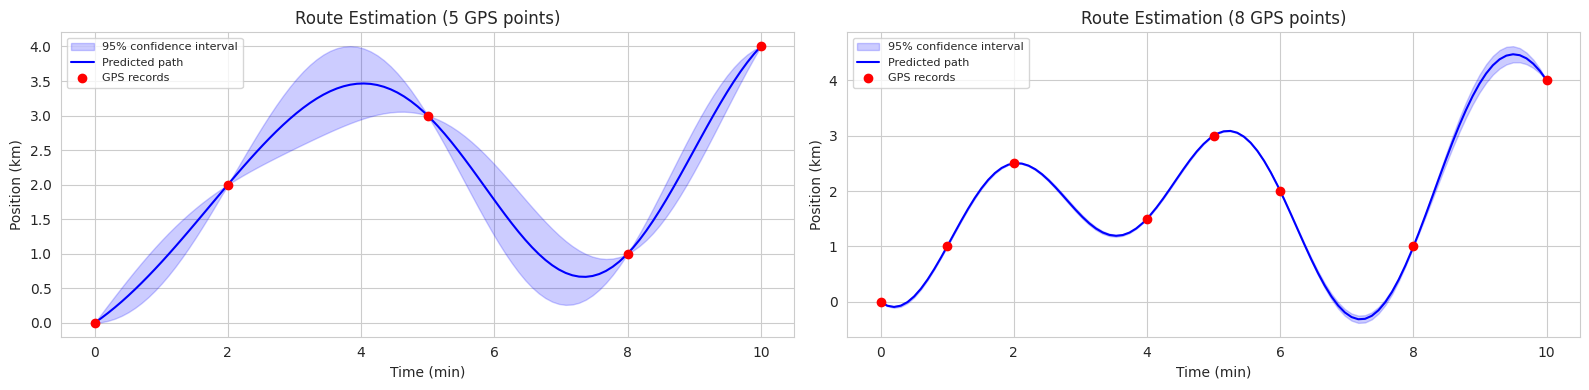

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

# 데이터셋 1: 5개 관측점
time1 = np.array([0, 2, 5, 8, 10]).reshape(-1, 1)
position1 = np.array([0, 2, 3, 1, 4])

# 데이터셋 2: 8개 관측점
time2 = np.array([0, 1, 2, 4, 5, 6, 8, 10]).reshape(-1, 1)
position2 = np.array([0, 1, 2.5, 1.5, 3, 2, 1, 4])  # 더 큰 변동성 추가

# 예측할 시간점 생성: 0~10분 구간을 100개로 분할
time_pred = np.linspace(0, 10, 100).reshape(-1, 1)

# RBF 커널 함수 정의
def kernel(T1, T2, l=2.0):
    sqdist = np.sum(T1**2, 1).reshape(-1, 1) + np.sum(T2**2, 1) - 2 * np.dot(T1, T2.T)
    return np.exp(-0.5 * sqdist / l**2)

# 가우시안 프로세스 예측 함수
def predict_gp(time, position, time_pred):
    K = kernel(time, time)
    K_star = kernel(time_pred, time)
    K_star_star = kernel(time_pred, time_pred)
    mu_star = K_star.dot(np.linalg.inv(K)).dot(position)
    sigma_star = K_star_star - K_star.dot(np.linalg.inv(K)).dot(K_star.T)
    return mu_star, sigma_star

# 두 데이터셋에 대한 예측 수행
mu1, sigma1 = predict_gp(time1, position1, time_pred)
mu2, sigma2 = predict_gp(time2, position2, time_pred)

# 2개의 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 그래프 (5개 데이터)
ax1.fill_between(time_pred.flatten(),
                mu1 - 2*np.sqrt(np.diag(sigma1)),
                mu1 + 2*np.sqrt(np.diag(sigma1)),
                color='blue', alpha=0.2, label='95% confidence interval')
ax1.plot(time_pred, mu1, 'b-', linewidth=1.5, label='Predicted path')
ax1.plot(time1, position1, 'ro', markersize=6, label='GPS records')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Position (km)')
ax1.set_title('Route Estimation (5 GPS points)')
ax1.legend(fontsize=8)

# 두 번째 그래프 (8개 데이터)
ax2.fill_between(time_pred.flatten(),
                mu2 - 2*np.sqrt(np.diag(sigma2)),
                mu2 + 2*np.sqrt(np.diag(sigma2)),
                color='blue', alpha=0.2, label='95% confidence interval')
ax2.plot(time_pred, mu2, 'b-', linewidth=1.5, label='Predicted path')
ax2.plot(time2, position2, 'ro', markersize=6, label='GPS records')
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Position (km)')
ax2.set_title('Route Estimation (8 GPS points)')
ax2.legend(fontsize=8)

plt.tight_layout()
plt.show()

위 코드는 두 가지 시나리오(5개 관측점, 8개 관측점)에서 GP를 사용하여 자전거 경로를 추정하는 예제입니다. 각 그래프에서 파란색 실선은 예측된 평균 경로, 파란색 음영 영역은 95% 신뢰 구간(confidence interval)을 나타냅니다.

*   **데이터가 적을 때** (왼쪽 그래프): GPS 기록이 듬성듬성 있기 때문에, 예측의 불확실성(신뢰 구간의 폭)이 큽니다.
*   **데이터가 많을 때** (오른쪽 그래프): GPS 기록이 더 촘촘해지면서, 예측의 불확실성이 줄어들고, 예측된 경로가 실제 경로에 더 가까워집니다.

이처럼 GP는 예측 결과뿐만 아니라 예측의 불확실성까지 함께 제공하므로, 의사 결정 과정에서 불확실성을 고려해야 하는 다양한 분야(예: 자율 주행, 로봇 제어, 의료 진단)에서 유용하게 활용될 수 있습니다.

### 6.6.2 현대적 응용

가우시안 프로세스는 로봇 제어, 센서 네트워크 최적화, 분자 구조 예측, 기후 모델링, 천체 물리학 데이터 분석 등 다양한 과학/공학 분야에서 응용되고 있습니다. 머신러닝에서의 대표적인 응용은 이미 살펴본 하이퍼파라미터 최적화입니다. 또 다른 불확실성을 포함한 예측이 필요한 대표적인 분야는 자율 주행 자동차입니다.  상대 차량의 미래 위치를 예측해서 불확실성이 큰 구간에서는 더 방어적으로 운전하게 합니다. 또한, 환자 상태 변화를 예측하는 의료 분야, 주가를 예측하고 불확실성에 따른 리스크 관리를 하는 자산 시장 분야에서도 널리 응용됩니다. 최근에는 강화 학습(reinforcement learning) 분야와 딥러닝에서 생성 모델(generative model)과의 결합, 인과 관계 추론(causal inference), 메타 학습(meta-learning) 등에서 GP 응용이 활발히 연구되고 있습니다.

### 6.6.3 심층 커널 학습(Deep Kernel Learning)

가우시안 프로세스에서 가장 중요한 것은 커널(공분산 함수)입니다. 딥러닝은 표현(representation)을 데이터로부터 학습하는 데 강점이 있습니다. GP의 예측 능력과 딥러닝의 표현 학습 능력을 효율적으로 결합하려는 시도는 자연스러운 연구 방향입니다. 대표적인 방법이 커널을 RBF 커널처럼 미리 정의하는 대신, 신경망을 사용하여 데이터로부터 직접 학습하는 심층 커널 학습(Deep Kernel Learning, DKL)입니다.

DKL의 일반적인 구조는 다음과 같습니다.

1. **특징 추출 (Feature Extraction)**: 입력 데이터는 먼저 심층 신경망(일반적으로 CNN 또는 Transformer)을 통과하여 저차원의 특징 벡터(feature vector)로 변환됩니다.
2. **커널 계산 (Kernel Computation)**: 추출된 특징 벡터를 입력으로 받아, 가우시안 프로세스의 커널 함수(예: RBF 커널)를 사용하여 커널 행렬을 계산합니다.
3. **가우시안 프로세스 (Gaussian Process)**: 계산된 커널 행렬과 훈련 데이터를 사용하여 가우시안 프로세스 모델을 학습하고, 새로운 입력에 대한 예측(평균 및 분산)을 수행합니다.
DKL은 신경망을 통해 데이터로부터 유용한 특징 표현과 데이터 간의 유사도를 동시에 학습할 수 있다는 장점을 가집니다.  이를 통해 복잡한 데이터(예: 이미지, 그래프, 텍스트)에 대해서도 불확실성을 고려한 예측을 수행할 수 있습니다.

DKL은 다양한 분야에서 활용되고 있습니다.

*   **이미지 분류 (Image Classification)**: CNN을 사용하여 이미지 특징을 추출하고, GP를 사용하여 분류를 수행합니다.
*   **그래프 분류 (Graph Classification)**: 그래프 신경망(Graph Neural Network, GNN)을 사용하여 그래프 구조에서 특징을 추출하고, GP를 사용하여 그래프 분류를 수행합니다.
*   **분자 특성 예측 (Molecular Property Prediction)**: 분자 그래프를 입력으로 받아, 분자의 특성(예: 용해도, 독성)을 예측합니다.
*   **시계열 예측 (Time Series Forecasting)**: RNN을 사용하여 시계열 데이터의 특징을 추출하고, GP를 사용하여 미래 값을 예측합니다.
여기서는 DKL의 간단한 예제를 실행해보고, 파트 2에서 더 자세한 내용과 응용 사례를 살펴보겠습니다.


**심층 커널 네트워크**

먼저 심층 커널 네트워크를 정의합니다. 커널 네트워크는 커널 함수를 학습하는 신경망입니다. 이 신경망은 입력 데이터를 받아서 특징 표현을 출력합니다. 이 특징 표현은 커널 행렬을 계산하는 데 사용됩니다.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a neural network to learn the kernel
class DeepKernel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepKernel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)  # No activation on the final layer
        return x

심층 커널 신경망의 입력은 일반적으로 2D 텐서로, 첫 번째 차원은 배치 크기, 두 번째 차원은 입력 데이터의 차원입니다.  출력은 (배치 크기, 특징 표현 차원) 형태의 2D 텐서입니다.

**GP 레이어 정의**

GP 레이어는 심층 커널 네트워크의 출력을 받아 커널 행렬을 계산하고, 예측 분포를 계산합니다.

In [3]:

import torch
import torch.nn as nn

# Define the Gaussian Process layer
class GaussianProcessLayer(nn.Module):
    def __init__(self, num_dim, num_data):
        super(GaussianProcessLayer, self).__init__()
        self.num_dim = num_dim
        self.num_data = num_data
        self.lengthscale = nn.Parameter(torch.ones(num_dim))  # Length-scale for each dimension
        self.noise_var = nn.Parameter(torch.ones(1))  # Noise variance
        self.outputscale = nn.Parameter(torch.ones(1))  # Output scale

    def forward(self, x, y):
        # Calculate the kernel matrix (using RBF kernel)
        dist_matrix = torch.cdist(x, x)  # Pairwise distances between inputs
        kernel_matrix = self.outputscale * torch.exp(-0.5 * dist_matrix**2 / self.lengthscale**2)
        kernel_matrix += self.noise_var * torch.eye(self.num_data)

        # Calculate the predictive distribution (using Cholesky decomposition)
        L = torch.linalg.cholesky(kernel_matrix)
        alpha = torch.cholesky_solve(y.unsqueeze(-1), L)  # Add unsqueeze for correct shape
        predictive_mean = torch.matmul(kernel_matrix, alpha).squeeze(-1) # Remove extra dimension
        v = torch.linalg.solve_triangular(L, kernel_matrix, upper=False)
        predictive_var = kernel_matrix - torch.matmul(v.T, v)


        return predictive_mean, predictive_var

        return predictive_mean, predictive_var

GP 레이어의 입력은 (배치 크기, 특징 표현 차원) 형태의 2D 텐서입니다. 출력은 예측 평균과 분산을 포함하는 튜플입니다.  커널 행렬 계산에는 RBF 커널을 사용하며, 예측 분포 계산에는 촐레스키 분해(Cholesky decomposition)를 활용하여 계산 효율성을 높였습니다. `y.unsqueeze(-1)`와 `.squeeze(-1)`은 y와 커널 행렬 간의 차원을 맞추기 위한 것입니다.

Epoch 1, Loss: 4.3467857893837725e-13
Epoch 11, Loss: 3.1288711313699757e-13
Epoch 21, Loss: 3.9212150236903054e-13
Epoch 31, Loss: 4.184870765894244e-13
Epoch 41, Loss: 2.9785689973499396e-13
Epoch 51, Loss: 3.8607078688482344e-13
Epoch 61, Loss: 3.9107123572454383e-13
Epoch 71, Loss: 2.359286811054462e-13
Epoch 81, Loss: 3.4729958167147024e-13
Epoch 91, Loss: 2.7600995490886793e-13


/tmp/ipykernel_1408185/2425174321.py:40: RuntimeWarning: invalid value encountered in sqrt
  plt.fill_between(x, predictive_mean.numpy() - 1.96 * np.sqrt(predictive_var.numpy().diagonal()),
/tmp/ipykernel_1408185/2425174321.py:41: RuntimeWarning: invalid value encountered in sqrt
  predictive_mean.numpy() + 1.96 * np.sqrt(predictive_var.numpy().diagonal()),


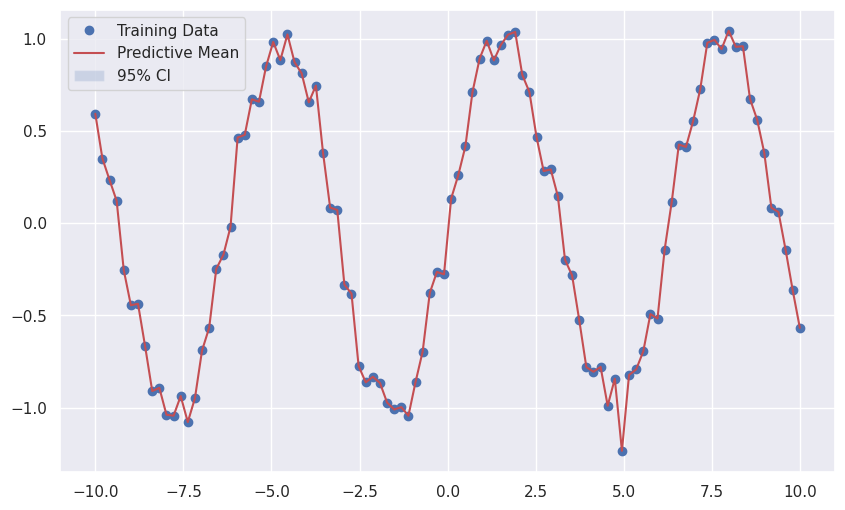

In [4]:
# 데이터를 생성
x = np.linspace(-10, 10, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# 데이터를 텐서로 변환
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)  # (100,) -> (100, 1)
y_tensor = torch.tensor(y, dtype=torch.float32)  # (100,)


# 딥 커널과 GP 레이어를 초기화
deep_kernel = DeepKernel(input_dim=1, hidden_dim=50, output_dim=1)  # output_dim=1로 수정
gp_layer = GaussianProcessLayer(num_dim=1, num_data=len(x))

# 손실 함수와 최적화기를 정의
loss_fn = nn.MSELoss()  # Use MSE loss
optimizer = optim.Adam(list(deep_kernel.parameters()) + list(gp_layer.parameters()), lr=0.01)

num_epochs = 100
# 모델을 학습
for epoch in range(num_epochs):
    optimizer.zero_grad()
    kernel_output = deep_kernel(x_tensor)
    predictive_mean, _ = gp_layer(kernel_output, y_tensor) # predictive_var는 사용 안함
    loss = loss_fn(predictive_mean, y_tensor)  # Use predictive_mean here
    loss.backward()
    optimizer.step()
    if(epoch % 10 == 0):
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# 예측을 수행
with torch.no_grad():
    kernel_output = deep_kernel(x_tensor)
    predictive_mean, predictive_var = gp_layer(kernel_output, y_tensor)

# 결과를 시각화
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Training Data')
plt.plot(x, predictive_mean.numpy(), 'r-', label='Predictive Mean')
plt.fill_between(x, predictive_mean.numpy() - 1.96 * np.sqrt(predictive_var.numpy().diagonal()),
                 predictive_mean.numpy() + 1.96 * np.sqrt(predictive_var.numpy().diagonal()),
                 alpha=0.2, label='95% CI')
plt.legend()
plt.show()

모델 학습에는 평균 제곱 오차(Mean Squared Error, MSE) 손실 함수를 사용하고, Adam 옵티마이저를 사용하여 딥 커널 네트워크와 GP 레이어의 파라미터를 동시에 학습시킵니다.

#### 6.6.4 DKL의 가능성과 한계

앞선 예제는 심층 커널 학습(Deep Kernel Learning, DKL)의 기본적인 아이디어를 보여줍니다. 딥러닝 모델(`DeepKernel` 클래스)을 사용하여 입력 데이터의 특징을 추출하고, 이 특징을 사용하여 가우시안 프로세스(GP)의 커널을 계산합니다. 그리고 GP를 사용하여 예측의 평균과 분산(불확실성)을 계산합니다. 이처럼 DKL은 딥러닝의 표현 학습 능력과 GP의 불확실성 추정 능력을 결합하여, 복잡한 데이터에서도 신뢰성 있는 예측을 가능하게 합니다.

**DKL의 가능성:**

*   **데이터 효율성:** GP는 데이터가 적을 때에도 잘 작동하는 경향이 있습니다. DKL은 딥러닝의 강력한 특징 추출 능력과 GP의 데이터 효율성을 결합하여, 적은 데이터로도 좋은 성능을 낼 수 있습니다.
*   **불확실성 추정:** DKL은 예측의 불확실성을 정량화할 수 있습니다. 이는 안전성이 중요한 응용 분야(예: 의료 진단, 자율 주행)에서 매우 유용합니다.
*   **유연성:** DKL은 다양한 종류의 데이터(이미지, 텍스트, 그래프 등)에 적용할 수 있습니다. 신경망 아키텍처를 자유롭게 선택하여 문제에 맞는 특징 추출기를 설계할 수 있습니다.
*   **베이지안 최적화와의 결합:** DKL은 베이지안 최적화와 결합하여 모델의 하이퍼파라미터를 효율적으로 튜닝할 수 있습니다.

**DKL의 한계:**

*   **계산 비용:** GP는 여전히 계산 비용이 높습니다. 특히, 훈련 데이터가 많아지면 커널 행렬의 크기가 커져서 계산이 어려워집니다.
*   **신경망 설계:** DKL의 성능은 특징 추출기(신경망)의 설계에 크게 의존합니다. 적절한 신경망 아키텍처를 선택하는 것은 여전히 어려운 문제입니다.
*   **이론적 이해 부족:** DKL의 이론적 분석은 아직 초기 단계입니다. 왜 DKL이 잘 작동하는지, 어떤 조건에서 좋은 성능을 보이는지에 대한 더 많은 연구가 필요합니다.

#### 맺음말

이 장에서는 딥러닝 모델의 과적합 문제를 해결하기 위한 다양한 기법들을 살펴보았습니다. L1/L2 규제, 드롭아웃, 배치 정규화와 같은 전통적인 방법부터, 베이지안 최적화, 가우시안 프로세스, 그리고 심층 커널 학습과 같은 고급 기법까지, 딥러닝 연구는 모델의 일반화 성능을 향상시키기 위해 끊임없이 발전해 왔습니다.

과적합은 딥러닝 모델이 훈련 데이터에만 지나치게 특화되어 새로운 데이터에 대한 예측 성능이 떨어지는 현상입니다. 이는 모델의 복잡도가 너무 높거나, 훈련 데이터가 부족하거나, 데이터에 노이즈가 많을 때 발생할 수 있습니다. 과적합을 방지하는 것은 딥러닝 모델을 실제 문제에 적용하는 데 있어 매우 중요한 과제입니다.

이 장에서 소개된 다양한 기법들은 각기 다른 방식으로 과적합 문제에 접근합니다.

*   **규제:** 모델의 복잡도에 페널티를 부여하여 가중치가 너무 커지는 것을 방지합니다. (L1, L2, Elastic Net)
*   **드롭아웃:** 학습 과정에서 무작위로 뉴런을 제거하여, 특정 뉴런이나 뉴런 간의 조합에 모델이 의존하는 것을 막습니다.
*   **배치 정규화:** 각 층의 입력을 정규화하여, 학습을 안정화하고 가속화합니다.
*   **하이퍼파라미터 최적화:** 베이지안 최적화와 같은 방법을 사용하여 모델의 성능을 최적화하는 하이퍼파라미터 조합을 찾습니다.
*  **가우시안 프로세스, 심층커널학습**: 불확실성을 명시적으로 모델링하여, 좀 더 신뢰도 있는 예측을 합니다.

이러한 기법들을 적절히 조합하고, 문제의 특성에 맞게 튜닝하는 것은 딥러닝 엔지니어의 중요한 역량 중 하나입니다.  "모든 경우에 완벽한" 단 하나의 해결책은 없으며, 실험과 분석을 통해 최적의 방법을 찾아나가야 합니다. 딥러닝 연구는 계속해서 빠르게 발전하고 있으며, 과적합을 해결하기 위한 새로운 기법들이 계속해서 등장할 것입니다.


## 연습문제

### 기본 문제

1.  과적합(overfitting)과 과소적합(underfitting)의 개념을 설명하고, 각 현상이 발생했을 때 모델의 성능에 어떤 영향을 미치는지 설명하시오.
2.  L1 규제와 L2 규제의 차이점을 설명하고, 각 규제가 모델의 가중치에 어떤 영향을 미치는지 설명하시오.
3.  드롭아웃(dropout)의 작동 원리를 설명하고, 드롭아웃이 과적합을 방지하는 데 어떻게 도움이 되는지 설명하시오.
4.  배치 정규화(batch normalization)의 개념을 설명하고, 배치 정규화가 딥러닝 모델의 학습에 어떤 이점을 제공하는지 설명하시오.
5.  주어진 코드에서 custom_loss함수의 각 lambda를 변경해가면서 그래프에 어떠한 변화가 있는지 서술하라.
6.  L1, L2 놈(norm)을 정의하시오.
7.  배치 정규화의 수식에서 평균과 분산이 어떻게 계산되는지, 그리고 이들이 정규화 과정에 어떻게 사용되는지 설명하시오.

### 응용 문제

1.  주어진 데이터셋에 대해 다항식 회귀(polynomial regression) 모델을 학습시키고, 차수(degree)를 변화시키면서 과적합과 과소적합 현상을 관찰하시오. (Python 코드 작성)
2.  간단한 신경망 모델을 만들고, L1 또는 L2 규제를 적용하여 모델의 가중치 변화를 관찰하고, 규제 강도에 따른 성능 변화를 비교하시오. (Python 코드 작성)
3.  드롭아웃 비율을 다르게 설정하여 신경망 모델을 학습시키고, 각 비율에 따른 훈련/검증 손실과 정확도를 비교하시오. (Python 코드 작성)
4.  배치 정규화 층을 추가하거나 제거하면서 신경망 모델의 학습 속도와 수렴 안정성을 비교하시오. (Python 코드 작성)
5.  라그랑주 승수법(Lagrange multiplier method)을 사용하여 L1, L2 규제가 적용된 손실 함수의 최적해 조건을 유도하시오.
6.  배치 정규화의 역전파(backpropagation) 과정을 유도하고, 배치 정규화가 기울기 소실 문제를 완화하는 데 어떻게 도움이 되는지 설명하시오.

### 심화 문제

1.  L1 규제와 L2 규제가 손실 평면(loss surface)에 미치는 영향을 시각화하고, 각 규제의 기하학적 의미를 설명하시오. (Python 코드 작성)
2.  드롭아웃을 앙상블(ensemble) 학습의 관점에서 해석하고, 드롭아웃이 모델의 불확실성(uncertainty) 추정에 어떻게 활용될 수 있는지 설명하시오.
3.  다양한 하이퍼파라미터 최적화 기법(그리드 탐색, 랜덤 탐색, 베이지안 최적화 등)을 비교하고, 각 기법의 장단점을 설명하시오.
4.  BoTorch를 사용하지 말고, 베이지안 최적화의 핵심 아이디어를 구현하여 간단한 함수의 최적값을 찾는 코드를 작성하시오. (Python 코드 작성, 라이브러리 사용 가능)
5.  가우시안 프로세스(Gaussian Process)의 기본 원리를 설명하고, 가우시안 프로세스가 불확실성을 포함한 예측을 어떻게 수행하는지 설명하시오.
6.  가우시안 프로세스의 커널 함수(kernel function)가 만족해야 할 조건을 설명하고, RBF 커널이 이 조건을 만족함을 증명하시오.
7.  베이지안 최적화에서 획득 함수(acquisition function)의 역할을 설명하고, Expected Improvement (EI) 획득 함수의 수식을 유도하고 그 의미를 설명하시오.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (연습문제 해답)"}

## 연습문제 해답

### 기본 문제

1.  **과적합/과소적합:**
    *   **과적합 (Overfitting):** 모델이 훈련 데이터에 너무 잘 맞춰져서 새로운 데이터(검증/테스트 데이터)에 대한 성능(일반화 성능)이 떨어지는 현상입니다. 훈련 데이터에서는 성능이 높지만, 검증/테스트 데이터에서는 성능이 낮습니다.
    *   **과소적합 (Underfitting):** 모델이 너무 단순해서 훈련 데이터의 패턴을 충분히 학습하지 못한 현상입니다. 훈련, 검증, 테스트 데이터 모두에서 낮은 성능을 보입니다.

2.  **L1/L2 규제:**
    *   **L1 규제 (Lasso):** 손실 함수에 가중치의 절댓값 합을 더합니다.
        $\lambda \sum_{i} |w_i|$
        일부 가중치를 정확히 0으로 만들어 특성 선택(feature selection) 효과를 냅니다.
    *   **L2 규제 (Ridge):** 손실 함수에 가중치의 제곱 합을 더합니다.
        $\lambda \sum_{i} (w_i)^2$
        가중치를 0에 가깝게 만들지만, 완전히 0으로 만들지는 않습니다.

3.  **드롭아웃:**
    *   **작동 원리:** 학습 과정에서 무작위로 일부 뉴런을 비활성화(출력을 0으로 만듦)합니다.
    *   **과적합 방지:** 매번 다른 뉴런 조합으로 학습하므로, 특정 뉴런에 의존하는 것을 막고 앙상블 학습 효과를 냅니다.

4.  **배치 정규화:**
    *   **개념:** 각 층의 입력을 평균 0, 분산 1로 정규화합니다.
    *   **이점:** 학습 속도 향상, 기울기 소실/폭발 문제 완화, 더 높은 학습률 사용 가능, 약간의 규제 효과.

5.  **`custom_loss` lambda 변화:**
    *   **`lambda` 증가:** 규제 항의 영향력이 커집니다. 가중치가 작아지고, 모델이 단순해져 과소적합될 가능성이 증가합니다.
    *   **`lambda` 감소:** 규제 항의 영향력이 작아집니다. 가중치가 커지고, 모델이 복잡해져 과적합될 가능성이 증가합니다.

6.  **L1/L2 놈:**
    *   **L1 놈:** 벡터 요소들의 절댓값 합.
        $\| \mathbf{x} \|_1 = |x_1| + |x_2| + \dots + |x_n|$
    *   **L2 놈:** 벡터 요소들의 제곱 합의 제곱근 (유클리드 거리).
        $\| \mathbf{x} \|_2 = \sqrt{|x_1|^2 + |x_2|^2 + \dots + |x_n|^2}$

7.  **배치 정규화 수식:**
    *   **평균 (μ):** 미니 배치 내 샘플들의 평균.
        $\mu = \frac{1}{m} \sum_{i=1}^{m} x_i$
    *   **분산 (σ²):** 미니 배치 내 샘플들의 분산.
        $\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2$
    *   **정규화:**
        $x_{i\_\text{norm}} = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}$
        (ε은 0으로 나누는 것을 방지하기 위한 작은 상수)

### 응용 문제

1.  **다항식 회귀:** (코드 생략) 차수를 너무 높이면 과적합, 너무 낮추면 과소적합됩니다.

2.  **L1/L2 규제:** (코드 생략) 규제 강도(`lambda`)가 강할수록 가중치가 작아지고, 성능 변화를 관찰합니다.

3.  **드롭아웃 비율:** (코드 생략) 적절한 드롭아웃 비율은 과적합을 방지하고 성능을 향상시킬 수 있습니다. 너무 높은 비율은 과소적합을 유발할 수 있습니다.

4.  **배치 정규화:** (코드 생략) 배치 정규화를 추가하면 학습 속도가 빨라지고, 수렴이 안정되는 경향을 보입니다.

5.  **라그랑주 승수법:**
    *   **L2 규제:**
        $L(\mathbf{w}, \lambda) = \text{Loss}(\mathbf{w}) + \lambda (\|\mathbf{w}\|_2^2 - c)  \rightarrow  \nabla_\mathbf{w}L = \nabla_\mathbf{w}\text{Loss}(\mathbf{w}) + 2\lambda\mathbf{w} = 0$
    *   **L1 규제:**
        $L(\mathbf{w}, \lambda) = \text{Loss}(\mathbf{w}) + \lambda (\|\mathbf{w}\|_1 - c)  \rightarrow  \nabla_\mathbf{w}L = \nabla_\mathbf{w}\text{Loss}(\mathbf{w}) + \lambda \cdot \text{sign}(\mathbf{w}) = 0$
        (sign(w)는 w의 부호)

6.  **배치 정규화 역전파:** (유도 생략) 배치 정규화는 각 층의 입력을 정규화하여 기울기 소실/폭발 문제를 완화하고, 학습을 안정화합니다.

### 심화 문제

1.  **손실 평면 시각화:** (코드 생략) L1 규제는 마름모 형태, L2 규제는 원 형태의 제약 조건을 생성하여, 최적해가 다른 위치에서 형성됩니다.

2.  **드롭아웃 앙상블:** 드롭아웃은 매번 다른 네트워크 구조로 학습하는 효과를 내므로, 앙상블 학습과 유사합니다. 예측 시에는 모든 뉴런을 사용하여 (드롭아웃 없이) 평균적인 예측을 수행합니다. 몬테카를로 드롭아웃(Monte Carlo dropout)을 통해 예측의 불확실성을 추정할 수 있습니다.

3.  **하이퍼파라미터 최적화 기법:**
    *   **그리드 탐색:** 모든 조합 시도. 계산 비용이 매우 큽니다.
    *   **랜덤 탐색:** 무작위 조합 시도. 그리드 탐색보다 효율적일 수 있습니다.
    *   **베이지안 최적화:** 이전 탐색 결과를 바탕으로 확률 모델을 사용하여 다음 탐색 지점을 결정. 효율적입니다.

4.  **베이지안 최적화 구현:** (코드 생략) 대리 모델(surrogate model, 예: 가우시안 프로세스)과 획득 함수(acquisition function, 예: Expected Improvement)를 사용하여 구현합니다.

5.  **가우시안 프로세스:** 함수에 대한 확률 분포입니다. 커널 함수를 사용하여 함수 값들 사이의 공분산을 정의합니다. 주어진 데이터를 바탕으로 사후 분포를 계산하여 예측의 평균과 분산(불확실성)을 제공합니다.

6.  **커널 함수 조건:** 양의 준정부호성(positive semi-definiteness)을 만족해야 합니다. 임의의 입력 점들에 대해 생성되는 커널 행렬(Gram matrix)이 양의 준정부호(positive semi-definite) 행렬이어야 합니다. RBF 커널은 이 조건을 만족합니다. (증명 생략)

7.  **획득 함수:** 베이지안 최적화에서 다음 탐색 지점을 결정하는 데 사용됩니다. Expected Improvement (EI)는 현재까지의 최적값보다 더 좋은 결과를 얻을 가능성과 그 향상 정도를 고려하여 다음 탐색 지점을 선택합니다. (수식 유도 생략)

:::


1.  **Dropout: A Simple Way to Prevent Neural Networks from Overfitting** (Srivastava et al., 2014): 드롭아웃의 개념과 효과를 설명하는 원 논문. ([https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf](https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf))
2.  **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift** (Ioffe & Szegedy, 2015): 배치 정규화의 개념과 효과를 설명하는 원 논문. ([https://arxiv.org/abs/1502.03167](https://arxiv.org/abs/1502.03167))
3.  **Deep Learning** (Goodfellow et al., 2016): 딥러닝 교과서. 7장 "Regularization for Deep Learning"에서 과적합 및 규제 기법을 자세히 다룹니다. ([http://www.deeplearningbook.org/](http://www.deeplearningbook.org/))
4.  **Understanding the difficulty of training deep feedforward neural networks** (Glorot & Bengio, 2010): 초기 딥러닝 모델의 학습 어려움과 가중치 초기화 방법의 중요성을 설명. ([http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf))
5.  **Regularization techniques for deep learning: A survey** (Kukacka et al., 2017): 다양한 규제 기법들을 종합적으로 비교 분석한 논문.
6.  **A Tutorial on Bayesian Optimization** (Frazier, 2018): 베이지안 최적화의 기본 개념과 응용을 설명하는 튜토리얼. ([https://arxiv.org/abs/1807.02811](https://arxiv.org/abs/1807.02811))
7. **Bayesian Optimization** (Garnett, 2023): 베이지안 최적화에 대한 종합적인 교과서 ([https://www.bayesoptbook.com/](https://www.bayesoptbook.com/))
8. **Gaussian Processes for Machine Learning** (Rasmussen & Williams, 2006): 가우시안 프로세스의 기본 원리와 머신러닝 응용을 다룬 교과서. ([http://www.gaussianprocess.org/gpml/](http://www.gaussianprocess.org/gpml/))
9.  **Deep Kernel Learning** (Wilson et al., 2016): 딥 커널 학습의 개념과 방법을 설명하는 논문. ([https://arxiv.org/abs/1511.02222](https://arxiv.org/abs/1511.02222))
10. **Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow** (Aurélien Géron, 2019): 머신러닝 및 딥러닝 실습 교과서. 과적합 및 규제 기법을 실제 코드 예제와 함께 설명합니다.
11. **Adam: A Method for Stochastic Optimization** (Kingma & Ba, 2014) ([https://arxiv.org/abs/1412.6980](https://arxiv.org/abs/1412.6980)): Adam 옵티마이저에 대한 논문
12. **Decoupled Weight Decay Regularization** (Loshchilov & Hutter, 2017) ([https://arxiv.org/abs/1711.05101](https://arxiv.org/abs/1711.05101)): AdamW에 대한 논문